# TÉCNICAS DE APRENDIZAJE NO SUPERVISADO

Aunque en la actualidad la mayoría de las aplicaciones de Machine Learning están basadas en aprendizaje supervisado (y como resultado, es ahí donde van la mayoría de las inversiones), en realidad la gran mayoría de los datos disponibles no están etiquetados: tenemos características de entrada **X**, pero no tenemos etiquetas **y**. Yann LeCunn dijo que "si la inteligencia fuera un pastel, el aprendizaje no supervisado sería el pastel, el aprendizaje supervisado sería la guinda del pastel y el aprendizaje por refuerzo sería la cereza del pastel". En otras palabras, existe un enorme potencial en el aprendizaje no supervisado al que apenas hemos empezado a hincar el diente.

Por ejemplo, supongamos que queremos crear un sistema que tome algunas imágenes de cada artículo de una línea de producción y detecte cuáles son defectuosos. Podemos crear con bastante facilidad un sistema que tomara fotografías automáticamente, lo que nos proporcionaría miles de fotografías cada día. En solo unas pocas semanas dispondríamos de un enorme dataset. Pero espera, ¡no hay etiquetas! Si queremos entrenar un clasificador binario normal que prediga cuándo un artículo es defectuoso o no, necesitaremos etiquetar cada imagen individual como "defectuoso" o "normal". Esto normalmente requerirá que expertos humanos se sienten y revisen manualmente todas las imágenes. Esto es una tarea larga, costosa y tediosa, por lo que generalmente solo se realizará para un pequeño subconjunto de las imágenes disponibles. Como resultado, el dataset etiquetado será bastante pequeño y el rendimiento del clasificador será decepcionante. Además, cada vez que la compañía realice cambios en sus productos, será necesario reiniciar el proceso completo desde cero. ¿No sería genial si el algoritmo pudiera explotar los datos sin necesitad de que los humanos etiqueten cada imagen? Bienvenidos al aprendizaje no supervisado.

En el capítulo 8, vimos la tarea de aprendizaje no supervisado más común: la reducción dimensional. En este capítulo, veremos algunas tareas y algoritmos más de aprendizaje no supervisado:

+ *Clustering*: el objetivo es agrupar instancias similares juntas en un *cluster*. Esto es una gran herramienta para el análisis de datos, segmentación de clientes, sistemas de recomendación, motores de búsqueda, segmentación de imágenes, aprendizaje semi-supervisado, reducción dimensional y mas.

+ *Detección de anomalías*: el objetivo es aprender qué datos parecen "normales" y usar esto para detectar instancias anormales, como elementos defectuosos en una línea de producción o una nueva tendencia en series temporales.

+ *Estimación de densidad*: esta es la tarea de estimar la *función de densidad de la probabilidad* (PDF) del proceso aleatorio que generó el dataset. Se usa comunmente para la detección de anomalías: las instancias localizadas en regiones de muy baja densidad es probable que sean anomalías. También es útil para el análisis y visualización de datos.

¿Listo para un pastel? Empezaremos con el clustering, usando K-Means y DBSCAN, y después discutiremos los modelos de mezcla Gaussianos y veremos cómo pueden usarse para la estimación de densidad, clustering y detección de anomalías.

# Clustering

Mientras disfrutamos de una caminata por las montañas, nos topamos con una planta que nunca habíamos visto antes. Miramos a nuestro alrededor y nos damos cuenta de algunas más. No son exactamente idénticas, pero son lo suficientemente similares como para saber que probablemente pertenezcan a la misma especie (o al menos al mismo género). Es posible que necesitemos un botánico para que nos diga qué especie es, pero realmente no necesitamos un experto para identificar grupos de objetos que parecen similares. Esto se denomina *clustering*: es la tarea de identificar instancias similares y asignarlas a un *cluster*, es decir, grupos de instancias similares.

Como en la clasificación, cada instancia es asignada a un grupo. Sin embargo, esto es una tarea no supervisada. Consideremos la siguiente figura: a la izquierda está el dataset iris (que ya vimos en anteriores capítulos), donde cada especie de la instancia (es decir, su clase) está representada con un marcador diferente. Es un dataset etiquetado, para el cual los algoritmos de clasificación tales como el de Regresión Logística, SVM o Random Forest son muy adecuados. A la derecha está el mismo dataset, pero sin las etiquetas, por lo que ya no podemos usar un algoritmo de clasificación. Aquí es donde intervienen los algoritmos de clustering: la mayoría de ellos pueden detectar fácilmente el cluster situado más a la izquierda. También resulta fácil de ver con nuestros propios ojos, pero no es tan obvio que el cluster inferior derecho está compuesto realmente de dos sub-cluster distintos. Dicho esto, realmente el dataset tiene dos características adicionales (largo y ancho de sépalo), no representados aquí, y los algoritmos de clustering pueden hacer buen uso de todas las características, de hecho identifican bastante bien los tres clústeres (por ejemplo, usando un modelo de mezcla Gaussiana, solo 5 instancias de las 150 son asignadas a un cluster erróneo).

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

np.random.seed(42)

In [2]:
from sklearn.datasets import load_iris

In [3]:
data = load_iris()
X = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

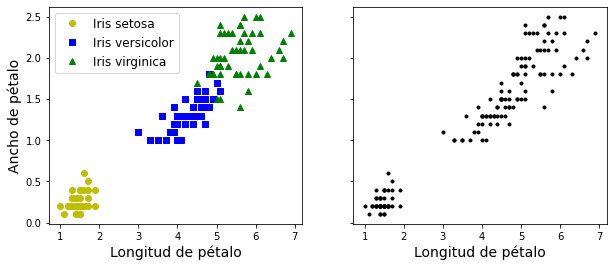

In [4]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.xlabel("Longitud de pétalo", fontsize=14)
plt.ylabel("Ancho de pétalo", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Longitud de pétalo", fontsize=14)
plt.tick_params(labelleft=False)

plt.show()

Un modelo de mezcla gaussiana (explicado a continuación) en realidad puede separar estos grupos bastante bien (usando las 4 características: longitud y ancho de pétalos y longitud y ancho de sépalos).

In [5]:
from sklearn.mixture import GaussianMixture

In [6]:
y_pred = GaussianMixture(n_components=3, random_state=42).fit(X).predict(X)
mapping = np.array([2, 0, 1])
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

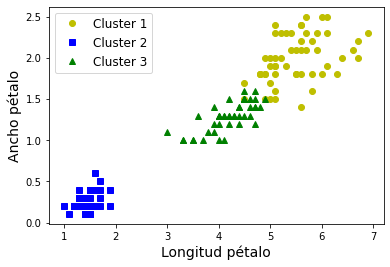

In [7]:
plt.plot(X[y_pred==0, 2], X[y_pred==0, 3], "yo", label="Cluster 1")
plt.plot(X[y_pred==1, 2], X[y_pred==1, 3], "bs", label="Cluster 2")
plt.plot(X[y_pred==2, 2], X[y_pred==2, 3], "g^", label="Cluster 3")
plt.xlabel("Longitud pétalo", fontsize=14)
plt.ylabel("Ancho pétalo", fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

In [8]:
np.sum(y_pred==y)

0

In [9]:
np.sum(y_pred==y) / len(y_pred)

0.0

El clustering se usa en una amplia variedad de aplicaciones, incluyendo:

+ Segmentación de clientes: podemos agrupar nuestros clientes basándonos en sus compras, su actividad en nuestro website, etc. Esto resulta muy útil para comprender quiénes son nuestros clientes y qué necesitan, así podemos adaptar nuestros productos y campañas de márketing a cada segmento. Por ejemplo, puede ser útil en *sistemas de recomendación* para sugerir contenido que les gustó a otros usuarios del mismo cluster.

+ Análisis de datos: cuando analizamos un nuevo dataset a menudo resulta útil en primer lugar descubrir grupos de instancias similares, ya que a menudo es más fácil analizar los clústeres por separado.

+ Como técnica de reducción dimensional: una vez que un dataset ha sido clusterizado, generalmente es posible medir la *afinidad* de cada instancia con cada cluster (afinidad es cualquier medida que nos diga cómo de bien una instancia encaja en un cluster). Cada vector **x** de características de cada instancia puede reemplazarse con el vector de sus clústeres afines. Si existen *k* clústeres, entonces este vector es *k* dimensional. Este es típicamente de mucha menor dimensión que el vector de características original, pero puede conservar suficiente información para su procesamiento posterior.

+ *Detección de anomalías* (también denominada *detección de atípicos*): cualquier instancia que tenga una baja afinidad con el resto de clústeres es probable que sea una anomalía. Por ejemplo, si hemos clusterizado los usuarios de nuestro website basándonos en su comportamiento, podemos detectar usuarios con un comportamiento inusual, tales como un número inusual de peticiones por segundo, etc. La detección de anomalías es particularmente útil en la detección de defectos de fabricación o en *detección de fraude*.

+ Aprendizaje semi-supervisado: si solo tenemos unas cuantas etiquetas, podemos ejecutar clustering y propagar las etiquetas a todas las instancias del mismo cluster. Esto puede aumentar drásticamente la cantidad de etiquetas disponibles para un subsiguiente algoritmo de aprendizaje supervisado y, por tanto, mejorar su rendimiento.

+ Para motores de búsqueda: por ejemplo, algunos motores de búsqueda nos dejan buscar por imágenes que son similares a una imagen de referencia. Para construir un sistema tal, primero deberíamos aplicar un algoritmo de clustering a todas las imágenes de nuestra base de datos: las imágenes similares terminarían en el mismo cluster. Entonces cuando un usuario proporcione una imagen de referencia, todo lo que necesitamos hacer es encontrar el cluster de la imagen usando un modelo entrenado en clustering y simplemente podemos devolver todas las imágenes pertenecientes a este cluster.

+ Segmentar una imagen: clusterizar píxeles de acuerdo a su color y después reemplazar cada color de pixel con el color medio de su cluster, nos permite reducir considerablemente el número de colores diferentes de la imagen. Esta técnica es usada en muchos sistemas de detección y seguimiento de objetos, ya que facilita la detección del contorno de cada objeto.

No existe una definición universal de qué es un cluster: depende realmente del contexto y algoritmos diferentes capturarán tipos diferentes de clústeres. Por ejemplo, algunos algoritmos buscan instancias centradas alrededor de un punto en particular, llamado *centroide*. Otros buscan regiones continuas de instancias densamente empaquetadas: estos grupos pueden tomar cualquier forma. Algunos algoritmos son jerárquicos, buscando clústeres de clústeres. Y la lista continúa.

En esta sección veremos dos populares algoritmos de clustering: K-Means y DBSCAN, y mostraremos algunas de sus aplicaciones, como la redución dimensional no lineal, el aprendizaje semi-supervisado y la detección de anomalías.

## K-Means

Consideremos el dataset no etiquetado representado en la siguiente figura: podemos ver claramente 5 manchas de instancias. El algoritmo K-Means es un sencillo algoritmo capaz de clusterizar este tipo de datasets muy rápida y eficientemente, a menudo en solo unas pocas iteraciones. Fue propuesto por Stuart Lloyd de los Laboratorios Bell en 1957 como una técnica para la modulación de códigos de pulsos, pero solo se publicó fuera de la compañía en 1982, en un artículo titulado ["Cuantización de mínimos cuadrados en PCM"](https://ieeexplore.ieee.org/abstract/document/1056489). Para entonces, en 1965, Edward W. Forgy había publicado virtualmente el mismo algoritmo, por lo que K-Means a veces se conoce como Lloyd-Forgy.

In [10]:
from sklearn.datasets import make_blobs

In [11]:
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [12]:
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

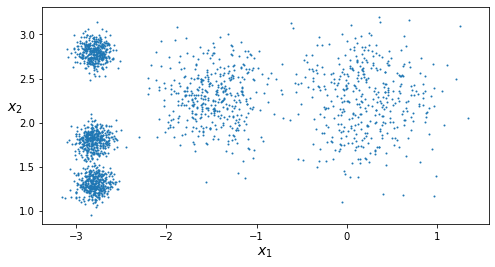

In [13]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)
    
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

Vamos a entrenar un clusterizador K-Means en este dataset. Intentaremos encontrar el centro de cada mancha y asignar cada instancia a la mancha más cercana:

In [14]:
from sklearn.cluster import KMeans

In [15]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

Observemos que hemos especificado el número de clústeres *k* que el algoritmo debe buscar. En este ejemplo, es muy obvio echando un vistazo a los datos que *k* debe establecerse a 5, pero en general esto nos es tan fácil. Veremos esto en breve.

Cada instancia se asignó a uno de los 5 clústeres. En el contexto de clustering, una *etiqueta* de instancia es el índice del cluster al que el algoritmo asigna esta instancia, que no debe ser confundido con las etiquetas de clase en la clasificación (recordemos que clustering es una tarea de aprendizaje no supervisado). La instancia `KMeans` conserva una copia de las etiquetas de las instancias que entrena, disponibles a través de la variable de instancia `labels_`:

In [16]:
y_pred

array([4, 1, 0, ..., 3, 0, 1])

In [17]:
y_pred is kmeans.labels_

True

También podemos echar un vistazo a los 5 centroides que encontró el algoritmo:

In [18]:
kmeans.cluster_centers_

array([[ 0.20876306,  2.25551336],
       [-2.80389616,  1.80117999],
       [-1.46679593,  2.28585348],
       [-2.79290307,  2.79641063],
       [-2.80037642,  1.30082566]])

Por supuesto, podemos asignar fácilmente nuevas instancias al cluster cuyo centroide está más cercano:

In [19]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([0, 0, 3, 3])

Si dibujamos los límites de decisión de cada cluster, obtendríamos una teselación de Voronoi (véase la siguiente figura, donde cada centroide está representado por una X).

In [20]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

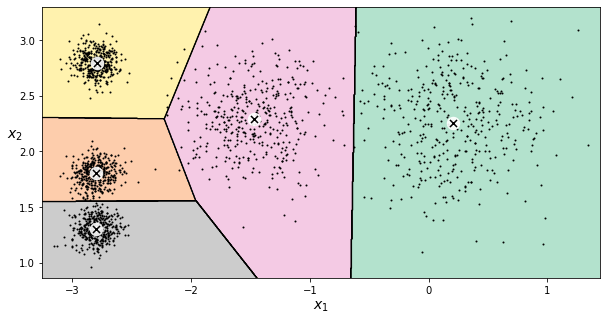

In [21]:
plt.figure(figsize=(10, 5))
plot_decision_boundaries(kmeans, X)
plt.show()

La gran mayoría de las instancias se asignaron claramente al cluster apropiado, pero algunas de ellas probablemente están mal etiquetadas (especialmente las cercanas al límite entre el cluster superior izquierdo y el cluster central). De hecho, el algoritmo K-Means no se comporta muy bien cuando los grupos tienen diámetros muy diferentes, dado que lo único que le importa al asignar una instancia a un cluster es la distancia al centroide.

En lugar de asignar cada instancia a un solo cluster, que se denomina *hard clustering*, puede ser útil dar a cada instancia una puntuación por cluster: esto se denomina *soft clustering*. Por ejemplo, la puntuación puede ser la distancia entre la instancia y el centroide o, por el contrario, puede ser una puntuación de similitud (o afinidad) tal como la Función Base Radial Gaussiana (vista en el capítulo 5). En la clase `Kmeans`, el método `transform()` mide la distancia de cada instancia a cada centroide:

In [22]:
kmeans.transform(X_new)

array([[0.32995317, 2.81093633, 1.49439034, 2.9042344 , 2.88633901],
       [2.80290755, 5.80730058, 4.4759332 , 5.84739223, 5.84236351],
       [3.29399768, 1.21475352, 1.69136631, 0.29040966, 1.71086031],
       [3.21806371, 0.72581411, 1.54808703, 0.36159148, 1.21567622]])

En este ejemplo, la primera instancia en `X_new` está localizada a una distancia de 0.32 del primer centroide, 2.81 del segundo centroide, 1.49 del tercer centroide, 2.90 del cuarto centroide y 2.88 del quinto centroide. Si tenemos un dataset de alta dimensión y lo transformamos de esta forma, terminaremos con un dataset de dimensión *k*: esta puede ser una técnica muy eficiente de reducción dimensional no lineal.

Podemos verificar que esta es realmente la distancia euclidiana entre cada instancia y cada centroide:

In [23]:
np.linalg.norm(np.tile(X_new, (1, k)).reshape(-1, k, 2) - kmeans.cluster_centers_, axis=2)

array([[0.32995317, 2.81093633, 1.49439034, 2.9042344 , 2.88633901],
       [2.80290755, 5.80730058, 4.4759332 , 5.84739223, 5.84236351],
       [3.29399768, 1.21475352, 1.69136631, 0.29040966, 1.71086031],
       [3.21806371, 0.72581411, 1.54808703, 0.36159148, 1.21567622]])

### El algoritmo K-Means

Entonces, ¿cómo funciona el algoritmo? Bueno, realmente es bastante simple. Supongamos que nos dieron los centroides: podríamos etiquetar fácilmente todas las instancias del dataset asignando cada una de ellas al cluster cuyo centroide esté más cercano. Por el contrario, si nos dan todas las etiquetas de instancias, podríamos localizar fácilmente todos los centroides calculando la media de las instancias de cada cluster. Pero si no nos dieran ni las etiquetas ni los centroides, ¿cómo podemos proceder? Bueno, simplemente comenzamos situando los centroides aleatoriamente (por ejemplo, eligiendo *k* instancias al azar y usando sus ubicaciones como centroides). Luego etiquetamos las instancias, actualizamos los centroides (para que sean la media de las instancias que se les asignan), etiquetamos las instancias, actualizamos los centroides y así sucesivamente hasta que los centroides dejen de moverse. El algoritmo garantiza converger en un número finito de pasos (normalmente bastante pequeño), y no oscilará para siempre (esto se puede demostrar señalando que la distancia cuadrática media entre las instancias y su centroide más cercano solo puede descender en cada paso).

Podemos ver el algoritmo en acción en la siguiente gráfica: los centroides se inicializan aleatoriamente (superior izquierda), luego las instancias son etiquetadas (superior derecha), luego los centroides son actualizados (central izquierda), se reetiquetan las instancias (central derecha) y así sucesivamente. Como se puede ver, en solo 3 iteraciones el algoritmo ha alcanzado un clustering que parece cercano al óptimo.

In [24]:
"""
La clase KMeans aplica un algoritmo optimizado por defecto. Para obtener el 
algoritmo K-Means original (solo con fines educativos), debemos establecer
init = "random", n_init = 1 y algorithm = "full".

Ejecutemos el algoritmo K-Means para 1, 2 y 3 iteraciones, para ver cómo se 
mueven los centroides:
"""

kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=1)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=2, random_state=1)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=3, random_state=1)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(algorithm='full', copy_x=True, init='random', max_iter=3, n_clusters=5,
       n_init=1, n_jobs=None, precompute_distances='auto', random_state=1,
       tol=0.0001, verbose=0)

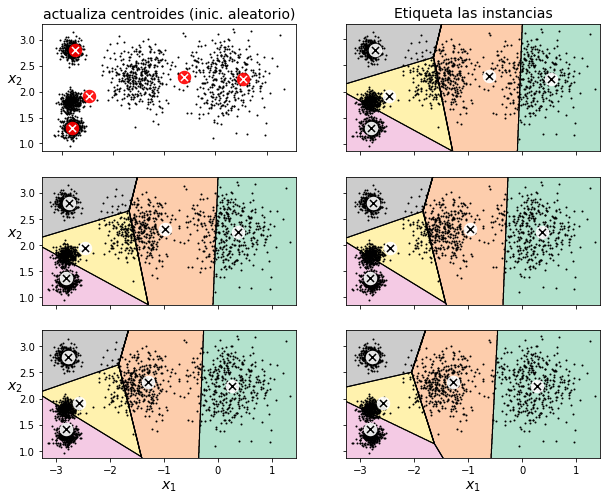

In [25]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("actualiza centroides (inic. aleatorio)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Etiqueta las instancias", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.show()

---

La complejidad computacional del algoritmo es generalmente lineal con respecto al número de instancias *m*, el número de clústeres *k* y el número de dimensiones *n*. Sin embargo, esto solo es cierto cuando los datos tienen una estructura de clustering. Si no es así, entonces, en el peor de los casos, la complejidad puede aumentar exponencialmente con el número de instancias. En la práctica, sin embargo, esto rara vez ocurre, y K-Means es generalmente uno de los algoritmos de clustering más rápidos.

---

Desafortunadamente, aunque el algoritmo garantiza su convergencia, puede no converger a la solución correcta (es decir, puede converger a un óptimo local): depende de la inicialización del centroide. Por ejemplo, la siguiente figura muestra dos soluciones sub-óptimas a las que el algoritmo puede converger si no tenemos suerte con el paso de inicialización aleatoria:

In [26]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

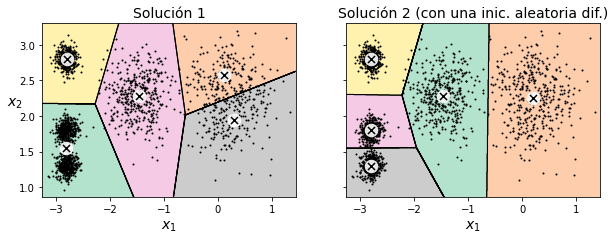

In [27]:
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full")
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full")

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solución 1", "Solución 2 (con una inic. aleatoria dif.)")

plt.show()

Veamos algunas formas de poder mitigar este riesgo mejorando la inicialización de los centroides.

### Métodos de inicialización de centroides

Si sabemos aproximadamente dónde deberían estar los centroides (por ejemplo, si anteriormente hemos ejecutado otro algoritmo de clustering), podemos establecer el hiperparámetro `init` con una matriz NumPy que contenga la lista de centroides y establecer `n_init` a `1`:

    good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
    kmeans = KMeans(n_clusters=5, init=good_init, n_init=1)

Otra solución es ejecutar el algoritmo múltiples veces con diferentes inicializaciones aleatorias y conservar la mejor solución. Esto se controla con el hiperparámetro `n_init`: por defecto, es igual a 10, lo que significa que todo el algoritmo descrito anteriormente en realidad se ejecuta 10 veces cuando llamamos a `fit()` y Scikit-Learn mantiene la mejor solución. ¿Pero cómo sabe exactamente cuál es la mejor solución? Bueno, por supuesto usa una métrica de rendimiento. Se denomina *inercia* del modelo: esta es la distancia cuadrática media entre cada instancia y su centroide más cercano. Es aproximadamente igual a 219,48 para el modelo de la izquierda de la figura anterior y 211,59 para el modelo de la derecha. La clase `KMeans` ejecuta el algoritmo `n_init` veces y conserva el modelo con la menor inercia.

Si somos curiosos, la inercia de un modelo es accesible a través de la variable de instancia `inertia_`:

In [28]:
kmeans_rnd_init1.inertia_, kmeans_rnd_init2.inertia_

(219.48142731436425, 211.59853725816822)

El método `score()` devuelve la inercia negativa. ¿Por qué negativa? Bueno, porque el método `score()` del predictor siempre debe respetar la regla "*grande es mejor*".

In [29]:
kmeans_rnd_init1.score(X), kmeans_rnd_init2.score(X)

(-219.4814273143641, -211.59853725816856)

In [30]:
kmeans_rnd_10_inits = KMeans(n_clusters=5, init="random", n_init=10,
                              algorithm="full", random_state=11)
kmeans_rnd_10_inits.fit(X)

KMeans(algorithm='full', copy_x=True, init='random', max_iter=300, n_clusters=5,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=11,
       tol=0.0001, verbose=0)

Como podemos ver, terminamos con el modelo inicial, que sin duda es la solución óptima de K-Means (al menos en términos de inercia, y suponiendo que $k=5$).

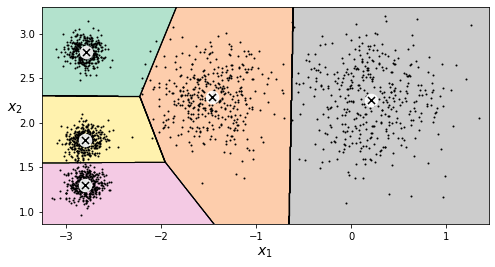

In [31]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show()

Una importante mejora al algoritmo K-Means, llamado *K-Means++*, se propuso en un [artículo de 2006](https://homl.info/37) por David Arthur y Sergei Vassilvitskii: introdujeron un paso de inicialización más inteligente que tendía a seleccionar centroides que están distantes el uno del otro, lo que hacía que el algoritmo K-Means sea mucho menos probable que converja a una solución subóptima. Mostraron que el cálculo adicional requerido para este paso de inicialización más inteligente vale la pena, dado que posibilita reducir drásticamente el número de veces que el algoritmo necesita ejecutarse para encontrar la solución óptima. Aquí está el algoritmo de inicialización K-Means++:

+ Toma un centroide **c**$_1$, elegido uniformemente al azar del dataset.

+ Toma un nuevo centroide **c**$_i$, eligiendo una instancia $\mathbf{x}_i$ con probabilidad: $D(\mathbf{x}_i)^2$ / $\sum\limits_{j=1}^{m}{D(\mathbf{x}_j)}^2$, donde $D(\mathbf{x}_i)$ es la distancia entre la instancia $\mathbf{x}_i$ y el centroide más cercanos que ya fue elegido. Esta distribución de probabilidad garantiza que las instancias que están más lejos de los centroides elegidos sean mucho más probables que sean elegidos como centroides.

+ Repite el paso anterior hasta que se hayan elegido todos los *k* centroides.

En realidad, la clase `KMeans` usa este método de inicialización por defecto. Si queremos forzar el uso del método original (es decir, elegir *k* instancias aleatoriamente para definir los centroides iniciales), entonces podemos establecer el hiperparámetro `init` a "`random`". Rara vez necesitaremos hacer esto.

Para establecer la inicialización en K-Means++, simplemente configuramos `init="k-means++"` (esto es realmente el valor predeterminado):

In [32]:
KMeans()

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [33]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans.fit(X)
kmeans.inertia_

211.5985372581684

### K-Means acelerados y K-Means de mini-lotes

Otra importante mejora al algoritmo K-Means se propuso en el [2003 en el artículo](https://homl.info/38) de Charles Elkan. Acelera considerablemente el algoritmo evitando muchos cálculos innecesarios de distancias: esto se consigue explotando la desigualdad triangular (es decir, la línea recta siempre es la más corta. La desigualdad triangular es AC $\leq$ AB + BC, donde A, B y C son tres puntos, y AB, AC y BC son las distancias entre esos puntos) y haciendo un seguimiento de los límites inferior y superior de las distancias entre las instancias y los centroides. Este es el algoritmo usado por defecto por la clase `KMeans` (pero podemos forzar el uso del algoritmo original estableciendo el hiperparámetro `algorithm` a `full`, aunque probablemente nunca necesitaremos hacerlo).

In [34]:
%timeit -n 50 KMeans(algorithm="elkan").fit(X)

70.4 ms ± 622 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [35]:
# Por defecto usa K-Means acelerado (Elkan)
%timeit -n 50 KMeans().fit(X)

72.1 ms ± 1.37 ms per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [36]:
%timeit -n 50 KMeans(algorithm="full").fit(X)

94.8 ms ± 1.5 ms per loop (mean ± std. dev. of 7 runs, 50 loops each)


Otra importante variante de algoritmo K-Means fue propuesta en [2010 en el artículo](https://homl.info/39) de David Sculley. En lugar de usar el dataset completo en cada iteración, el algoritmo es capaz de usar mini-lotes, moviendo los centroides ligeramente en cada iteración. Esto normalmente acelera el algoritmo en un factor de 3 a 4 y hace posible clusterizar grandes datasets que no caben en memoria. Scikit-Learn implementa este algoritmo en la clase `MiniBatchKMeans`. Podemos usar esta clase como la clase `KMeans`:

In [37]:
from sklearn.cluster import MiniBatchKMeans

In [38]:
minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
minibatch_kmeans.fit(X)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=5, n_init=3, random_state=42,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [39]:
minibatch_kmeans.inertia_

211.93186531476775

Si el dataset no cabe en memoria, la opción más simple es usar la clase `memmap`, como hicimos para PCA incremental en el capítulo 8. Alternativamente, podemos pasar un mini-lote cada vez al método `partial_fit()`, pero esto requerirá mucho más trabajo, dado que necesitaremos ejecutar múltiples inicializaciones y seleccionar la mejor nosotros mismos. Veámoslo:

Primero vamos a cargar MNIST.

In [40]:
import urllib
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.int64)

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    mnist["data"], mnist["target"], random_state=42)

Ahora escribimos a un `memmap` :

In [42]:
filename = "my_mnist.data"
X_mm = np.memmap(filename, dtype='float32', mode='write', shape=X_train.shape)
X_mm[:] = X_train

In [43]:
minibatch_kmeans = MiniBatchKMeans(n_clusters=10, batch_size=10, random_state=42)
minibatch_kmeans.fit(X_mm)

MiniBatchKMeans(batch_size=10, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=10, n_init=3, random_state=42,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

Si nuestros datos son tan grandes que no podemos usar `memmap`, las cosas se vuelven más complicadas. Comencemos escribiendo una función para cargar el próximo lote (en la vida real, cargaríamos los datos del disco):

In [44]:
def load_next_batch(batch_size):
    return X[np.random.choice(len(X), batch_size, replace=False)]

Ahora podemos entrenar el modelo alimentándolo con un lote a la vez. También necesitamos implementar múltiples inicializaciones y quedarnos con el modelo con la menor inercia:

In [45]:
np.random.seed(42)

In [46]:
k = 5
n_init = 10
n_iterations = 100
batch_size = 100
init_size = 500  # more data for K-Means++ initialization
evaluate_on_last_n_iters = 10

best_kmeans = None

for init in range(n_init):
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, init_size=init_size)
    X_init = load_next_batch(init_size)
    minibatch_kmeans.partial_fit(X_init)

    minibatch_kmeans.sum_inertia_ = 0
    for iteration in range(n_iterations):
        X_batch = load_next_batch(batch_size)
        minibatch_kmeans.partial_fit(X_batch)
        if iteration >= n_iterations - evaluate_on_last_n_iters:
            minibatch_kmeans.sum_inertia_ += minibatch_kmeans.inertia_

    if (best_kmeans is None or
        minibatch_kmeans.sum_inertia_ < best_kmeans.sum_inertia_):
        best_kmeans = minibatch_kmeans

In [47]:
best_kmeans.score(X)

-211.70999744411483

Aunque el algoritmo K-Means por mini-lotes es mucho más rápido que el algoritmo K-Means normal, su inercia es en general ligeramente peor, especialmente cuando aumenta el número de clústeres.

In [48]:
%timeit KMeans(n_clusters=5).fit(X)

40.1 ms ± 683 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [49]:
%timeit MiniBatchKMeans(n_clusters=5).fit(X)

23.5 ms ± 1.41 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Como podemos ver en la siguiente figura, la gráfica de la izquierda compara las inercias de los modelos K-Means por mini-lotes y K-Means entrenados en el anterior dataset usando varios números de clústeres *k*. La diferencia entre las dos curvas permanece ligeramente constante, pero esta diferencia se vuelve más y más significativa a medida que aumenta *k*, dado que la inercia se hace más y más pequeña. Sin embargo, en la gráfica de la derecha, podemos ver que K-Means por mini-lotes es mucho más rápido que K-Means normal y que esta diferencia aumenta con *k*.

In [50]:
from timeit import timeit

In [51]:
times = np.empty((100, 2))
inertias = np.empty((100, 2))
for k in range(1, 101):
    kmeans_ = KMeans(n_clusters=k, random_state=42)
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
    print("\r{}/{}".format(k, 100), end="")
    times[k-1, 0] = timeit("kmeans_.fit(X)", number=10, globals=globals())
    times[k-1, 1]  = timeit("minibatch_kmeans.fit(X)", number=10, globals=globals())
    inertias[k-1, 0] = kmeans_.inertia_
    inertias[k-1, 1] = minibatch_kmeans.inertia_

100/100

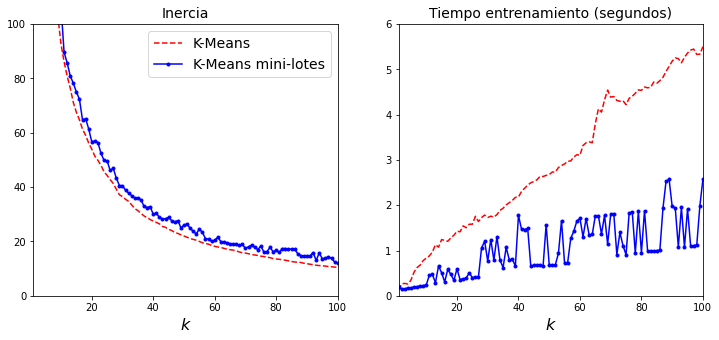

In [52]:
plt.figure(figsize=(12,5))

plt.subplot(121)
plt.plot(range(1, 101), inertias[:, 0], "r--", label="K-Means")
plt.plot(range(1, 101), inertias[:, 1], "b.-", label="K-Means mini-lotes")
plt.xlabel("$k$", fontsize=16)
plt.title("Inercia", fontsize=14)
plt.legend(fontsize=14)
plt.axis([1, 100, 0, 100])

plt.subplot(122)
plt.plot(range(1, 101), times[:, 0], "r--", label="K-Means")
plt.plot(range(1, 101), times[:, 1], "b.-", label="K-Means mini-lotes")
plt.xlabel("$k$", fontsize=16)
plt.title("Tiempo entrenamiento (segundos)", fontsize=14)
plt.axis([1, 100, 0, 6])

plt.show()

### Buscando el número óptimo de clústeres

Hasta ahora, hemos establecido el número de clústeres *k* a 5 porque era obvio mirando los datos que éste era el número correcto de clústeres. Pero, en general, no será tan fácil de saber cómo establecer *k* y el resultado puede ser bastante malo si establecemos el valor equivocado. Por ejemplo, como podemos ver en la siguiente figura, establecer *k* a 3 u 8 da como resultado modelos bastante malos:

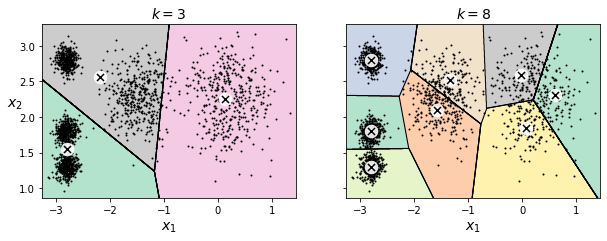

In [53]:
kmeans_k3 = KMeans(n_clusters=3, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, random_state=42)

plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "$k=3$", "$k=8$")
plt.show()

Quizás pensemos que podríamos elegir el modelo con la menor inercia ¿no?. Desafortunadamente no es tan simple. La inercia para *k*=3 es 653,2, que es mucho más alta que para *k*=5 (que es 211,6), pero con *k*=8 la inercia es solo 118,4.

In [54]:
kmeans_k3.inertia_, kmeans_k8.inertia_

(653.2167190021553, 118.41983763508077)

La inercia no es una buena métrica del rendimiento cuando intentamos elegir *k*, dado que sigue disminuyendo a medida que aumenta *k*. De hecho, cuantos más clústeres hay, más cerca estará cada instancia de su centroide más cercano y, por lo tanto, menor será la inercia. Dibujemos la inercia como una función de *k*:

In [55]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

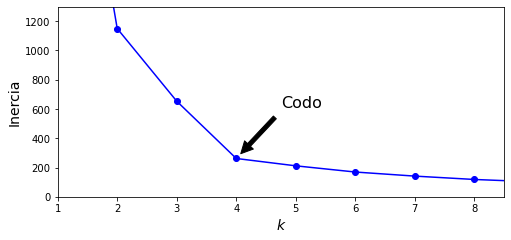

In [56]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inercia", fontsize=14)
plt.annotate('Codo',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])
plt.show()

Como podemos ver, la inercia cae muy rápidamente a medida que crece *k* hasta 4, pero luego disminuye mucho más lentamente a medida que seguimos aumentando *k*. Esta curva tiene aproximadamente la forma de un brazo y hay un "codo" en *k*=4, por lo que si no lo supiéramos mejor, podría ser una buena opción: cualquier valor menor sería dramático, mientras que cualquier valor más alto no ayudaría demasiado y podríamos estar dividiendo clústeres perfectamente buenos por la mitad sin ninguna buena razón.

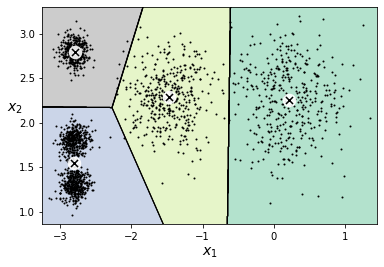

In [57]:
plot_decision_boundaries(kmeans_per_k[4-1], X)
plt.show()

Esta técnica para elegir el mejor valor para el número de clústeres es bastante burda. Un enfoque más preciso (pero también computacionalmente más costoso) es usar la *puntuación de la silueta*, que es el *coeficiente de silueta* medio en todas las instancias. El coeficiente de silueta de una instancia es igual a *(b - a) / max(a, b)*, donde *a* es la distancia media a las otras instancias del mismo cluster (es la distancia media intra-cluster), y *b* es la distancia media al cluster más cercano, es decir, la distancia media a las instancias del siguiente cluster más cercano (definido como el que minimiza *b*, excluyendo el propio cluster de la instancia). El coeficiente de silueta puede variar entre -1 y +1: un coeficiente cercano a +1 significa que la instancia está bien dentro de su propio cluster y lejos de otro clústeres, mientras que un coeficiente cercano a 0 significa que está cercano al límite del cluster y, por último, un coeficiente cercano a -1 significa que puede haber sido asignado a un cluster erróneo. Para calcular la puntuación de la silueta, podemos usar la función `silhouette_score()` de Scikit-Learn, dándole todas las instancias del dataset y las etiquetas que se les asignaron:

In [58]:
from sklearn.metrics import silhouette_score

In [59]:
silhouette_score(X, kmeans.labels_)

0.655517642572828

In [60]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

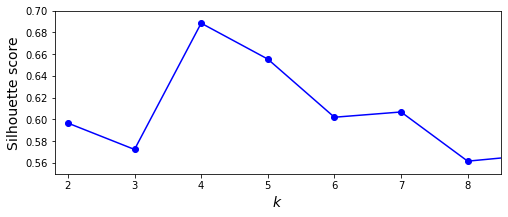

In [61]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()

Como podemos ver, esta visualización es mucho más rica que la anterior: en particular, aunque confirma que $k=4$ es una muy buena opción, también subraya el hecho de que $k=5$ también es una opción bastante buena, y mucho mejor que $k=6$ ó $7$. Esto no era visible cuando comparábamos inercias.

Se obtiene una visualización aún más informativa cuando dibujamos el coeficiente de silueta de cada instancia, ordenado por el cluster al que están asignadas y por el valor del coeficiente. Esto se denomina *diagrama de silueta*:

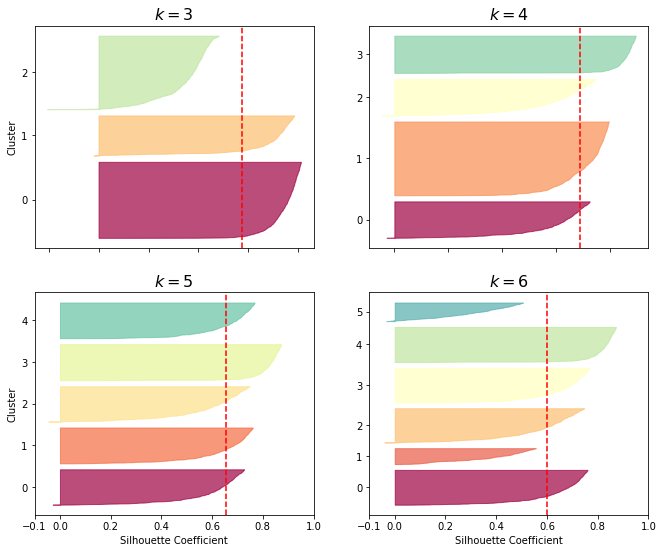

In [62]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

Las lineas discontinuas verticales representan la puntuación de silueta de cada uno de los números de clústeres. Cuando la mayoría de las instancias en un cluster tienen un coeficiente más bajo que esta puntuación (es decir, si la mayoría de las instancias se detienen antes de la línea discontinua, terminando a la izquiera de ella), entonces el cluster es bastante malo ya que eso significa que sus instancias están demasiado cerca de otros clústeres. Podemos ver que cuando $k=3$ y cuando $k=6$, obtenemos clústeres malos. Pero cuando $k=4$ o $k=5$, los clústeres se ven bastante bien -la mayoría de las instancias se extienden más allá de la línea discontinua, a la derecha y más cerca de 1.0. Cuando $k=4$, el cluster con el índice 1 (el tercero empezando por arriba) es bastante grande, mientras que cuando $k=5$ todos los clústeres tienen tamaños similares, por lo que a pesar de que la puntuación de silueta de $k=4$ es ligeramente mayor que para $k=5$, parece una buena idea usar $k=5$ para obtener clústeres de tamaños similares.

## Límites de K-Means

A pesar de sus muchos méritos, notablemente rápido y escalable, K-Means no es perfecto. Como vimos, es necesario ejecutar el algoritmo varias veces para evitar soluciones no óptimas, además de que necesitamos especificar el número de clústeres, lo que puede ser bastante molesto. Además, K-Means no se comporta muy bien cuando los clústeres tienen diferentes tamaños, diferentes densidades o formas no esféricas. Por ejemplo, en la siguiente figura se muestra cómo K-Means clusteriza un dataset conteniendo tres clústeres elipsoidales de diferentes dimensiones, densidades y orientaciones.

In [63]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

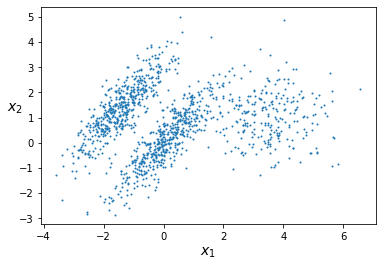

In [64]:
plot_clusters(X)

In [65]:
kmeans_good = KMeans(n_clusters=3, init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]), n_init=1, random_state=42)
kmeans_bad = KMeans(n_clusters=3, random_state=42)
kmeans_good.fit(X)
kmeans_bad.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

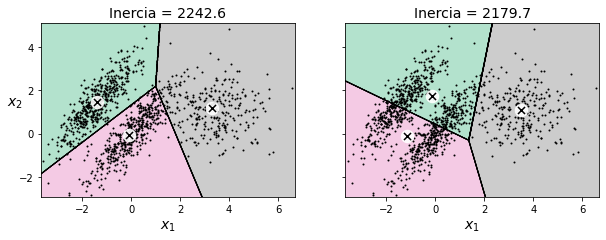

In [66]:
plt.figure(figsize=(10, 3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title("Inercia = {:.1f}".format(kmeans_good.inertia_), fontsize=14)

plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X, show_ylabels=False)
plt.title("Inercia = {:.1f}".format(kmeans_bad.inertia_), fontsize=14)

plt.show()

Como podemos ver, ninguna de estas soluciones es buena. La solución de la izquierda es mejor, pero sigue cortando el 25% del cluster central y lo asigna al cluster de la derecha. La solución de la derecha es terrible, a pesar de que su inercia es menor. Por tanto, dependiendo de los datos, diferentes algoritmos de clustering se ejecutan mejor. Por ejemplo, en estos tipos de clústeres elipsoides los modelos de mezcla Gaussiana funcionan mejor.

---

Es importante escalar las características de entrada antes de ejecutar K-Means o si no los clústeres pueden ser muy alargados y K-Means se ejecutará peor. Escalar las características no garantiza que todos los clústeres sean bonitos y esféricos, pero generalmente mejora las cosas.

---

Ahora veamos algunas formas en que podemos beneficiarnos del clustering. Usaremos K-Means, pero podemos usar cualquier otro tipo de algoritmos de clusterización.

## Uso de clustering para segmentación de imágenes

La *segmentación de imágenes* es la tarea de dividir una imagen en múltiples segmentos. En la *segmentación semántica* todos los píxeles que forman parte del mismo tipo de objeto se asignan al mismo segmento. Por ejemplo, en un sistema de visión de automóvil autónomo, todos los píxeles que forman parte de la imagen de un peatón se asignan al segmento "peatón" (solo habría un segmento conteniendo todos los peatones). En la *segmentación de instancia*, todos los píxeles que forman parte del mismo objeto individual se asignan al mismo segmento. En este caso habría un segmento diferente para cada peatón. El estado del arte en la segmentación semántica o de instancia hoy en día se logra usando complejas arquitecturas basadas en redes neuronales convolucionales. Aquí vamos a hacer algo mucho más simple: *segmentación de color*. Simplemente asignaremos píxeles al mismo segmento si tiene un color similar. En algunas aplicaciones esto puede ser suficiente, por ejemplo si queremos analizar imágenes de satélite para medir la cantidad total de área forestal en una región, la segmentación de color puede estar bien.

Primero vamos a cargar la imagen (ver la imágen superior izquiera de la siguiente figura) usando la función `imread()` de Matplotlib:

In [67]:
# Download the ladybug image
import os

images_path = os.path.join("images", "ch09")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "ladybug.png"
url = DOWNLOAD_ROOT + "images/unsupervised_learning/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('images\\ch09\\ladybug.png', <http.client.HTTPMessage at 0x26b4f8bbcd0>)

In [68]:
from matplotlib.image import imread
image = imread(os.path.join(images_path, filename))
image.shape

(533, 800, 3)

La imagen se representa como una matriz 3D: el tamaño de la primera dimensión es la altura, el segundo es el ancho y el tercero es el número de canales de color, en este caso rojo, verde y azul (RBG). En otra palabras, por cada píxel existe un vector 3D conteniendo las intensidades de rojo, verde y azul, cada uno entre 0.0 y 1.0 (o entre 0 y 255 si usamos `imageio.imreas()`). Algunas imágenes pueden tener menos canales, como son las imágenes en escala de grises (un canal), o más canales, como son las imágenes con un *canal alpha* adicional para la transparencia, o imágenes de satélite que a menudo tienen canales para muchas frecuencias de luz (por ejemplo, infrarojos). El código siguiente redimensiona la matriz para obtener una larga lista de colores RGB y luego clusteriza estos colores usando K-Means. Por ejemplo, puede identificar un cluster de color para todos los tonos de verde. A continuación, para cada color (por ejemplo, verde oscuro) busca el color medio del cluster de colores del píxel. Por ejemplo, todos los tonos de verde pueden ser reemplazados con el mismo color verde claro (asumiendo que el color medio del cluster verde es verde claro). Por último, redimensiona esta larga lista de colores para obtener la misma forma que la imagen original, ¡y hemos terminado!

In [69]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

In [70]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

Esto genera la imagen que se muestra en la esquina superior derecha de la siguiente figura. Podemos experimentar con varios números de clústeres, como se muestra en la figura. Cuando usamos menos de 8 clústeres, observemos que el llamativo color rojo de la mariquita no consigue un cluster propio: se fusiona con los colores del entorno. Esto es debido al hecho de que la mariquita es muy pequeña, mucho más pequeña que el resto de la imagen, así que aunque su color es llamativo, K-Means no puede dedicarle un cluster. Como se mencionó anteriormente, K-Means prefiere clústeres con tamaños similares.

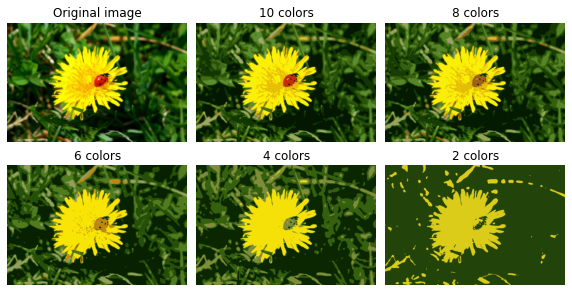

In [71]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')

plt.show()

Esto no fue demasiado difícil, ¿no? Ahora veamos otra aplicación del clustering: preprocesamiento.

## Uso de clustering para preprocesamiento

El clustering puede ser un enfoque eficiente para la reducción dimensional, en particular como una paso de preprocesamiento previo a un algoritmo de aprendizaje supervisado. Por ejemplo, abordemos el *dataset de dígitos*, que es un dataset simple similar al MNIST conteniendo 1.797 imágenes en escala de grises 8x8, representando dígitos del 0 al 9. Primero carguemos el dataset:

In [72]:
from sklearn.datasets import load_digits

In [73]:
X_digits, y_digits = load_digits(return_X_y=True)

Ahora, vamos a dividirlo en un conjunto de entrenamiento y uno de prueba:

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)

A continuación, vamos a entrenar un modelo de Regresión Logística:

In [76]:
from sklearn.linear_model import LogisticRegression

In [77]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Calculamos su precisión en el conjunto de prueba:

In [78]:
log_reg.score(X_test, y_test)

0.9688888888888889

Perfecto, esta será nuestra línea base: 96,9% de precisión. Veamos si podemos hacerlo mejor usando K-Means como paso de preprocesamiento. Crearemos un pipeline que primero clusterizará el conjunto de entrenamiento en 50 clústeres y reemplazará las imágenes con sus distancias a esos 50 clústeres y después aplicaremos un modelo de regresión logística.

---

Aunque es tentador definir el número de clústeres a 10, dado que existen 10 dígitos diferentes, es poco probable que funcione bien, debido a que hay varias formas diferentes de escribir cada dígito.

---

In [79]:
from sklearn.pipeline import Pipeline

In [80]:
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50, random_state=42)),
    ("log_reg", LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)),
])
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=50, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=42,
                        tol=0.0001, verbose=0)),
                ('log_reg',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=5000,
                                    multi_class='ovr', n_jobs=None,
                                    penalty='l2', random_state=42,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

Ahora vamos a evaluar este pipeline de clasificación:

In [81]:
pipeline.score(X_test, y_test)

0.98

¡Casi dividimos la tasa de error por una factor de 2!

Pero elegimos el número de clústeres *k* de forma totalmente arbitraria, seguramente podemos hacerlo mejor. Dado que K-Means es solo un paso de preprocesamiento en un pipeline de clasificación, encontrar un valor bueno para *k* es mucho más simple que antes: no es necesario ejecutar análisis de silueta o minimizar la inercia, el mejor valor de *k* es simplemente el que resulte de la mejor ejecución de clasificación durante la validación cruzada. Usemos `GridSerachCV` para encontrar el número óptimo de clústeres:

In [82]:
from sklearn.model_selection import GridSearchCV

In [83]:
param_grid = dict(kmeans__n_clusters=range(2, 100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2, n_jobs=-1)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:   26.4s
[Parallel(n_jobs=-1)]: Done 294 out of 294 | elapsed:  1.6min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('kmeans',
                                        KMeans(algorithm='auto', copy_x=True,
                                               init='k-means++', max_iter=300,
                                               n_clusters=50, n_init=10,
                                               n_jobs=None,
                                               precompute_distances='auto',
                                               random_state=42, tol=0.0001,
                                               verbose=0)),
                                       ('log_reg',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                      

Veamos el mejor valor para *k* y la ejecución del pipeline resultante:

In [84]:
grid_clf.best_params_

{'kmeans__n_clusters': 57}

In [85]:
grid_clf.score(X_test, y_test)

0.98

Con $k=57$ clústeres alcanzamos una precisión del 98% en el conjunto de prueba.

## Uso de clustering para aprendizaje semi-supervisado

Otro caso de uso del clustering es en el aprendizaje semi-supervisado, cuando tenemos muchas instancias sin etiquetar y muy pocas instancias etiquetadas. Entrenemos un modelo de regresión logística en una muestra de 50 instancias etiquetadas del dataset de dígitos:

In [86]:
n_labeled = 50

log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", random_state=42)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

¿Cuál es el rendimiento de este modelo en el conjunto de prueba?

In [87]:
log_reg.score(X_test, y_test)

0.8333333333333334

La precisión es solo del 83,3%: no debería sorprender que sea mucho más baja que antes cuando entrenamos el modelo en el conjunto de entrenamiento completo. Veamos cómo podemos hacerlo mejor. Primero, vamos a clusterizar el conjunto de entrenamiento en 50 clústeres, luego por cada cluster buscaremos la imagen más cerca del centroide. A estas imágenes las llamaremos imágenes representativas:

In [88]:
k = 50

kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

La siguiente figura muestra estas 50 imágenes representativas:

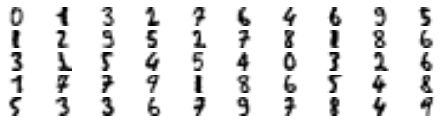

In [89]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')

plt.show()

Ahora veamos cada imagen y etiquetémosla manualmente:

In [90]:
y_representative_digits = np.array([
    0, 1, 3, 2, 7, 6, 4, 6, 9, 5,
    1, 2, 9, 5, 2, 7, 8, 2, 8, 6,
    3, 1, 5, 4, 5, 4, 0, 3, 2, 6,
    1, 7, 7, 9, 1, 8, 6, 5, 4, 8,
    5, 3, 3, 6, 7, 9, 7, 8, 4, 9])

Ahora tenemos un dataset con solo 50 instancias etiquetadas, pero en lugar de que sean instancias completamente aleatorias, cada una de ellas es una imagen representativa de su cluster. Veamos si la ejecución es algo mejor:

In [91]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.9177777777777778

¡Uff! Hemos pasado del 83,3% de precisión al 91,8%, a pesar de que solo estamos entrenando el modelo en 50 instancias. Dado que a menudo es costoso y penoso etiquetar instancias, especialmente cuando se hace manualmente por expertos, es una buena idea etiquetar instancias representativas en lugar de solo instancias aleatorias.

Pero quizás podemos ir un paso más allá: ¿qué pasaría si propagásemos las etiquetas al resto de instancias del mismo cluster? Esto se denomina *propagación de etiquetas*:

In [92]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

Ahora vamos a entrenar el modelo otra vez y veremos cuál es su rendimiento:

In [93]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train_propagated)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [94]:
log_reg.score(X_test, y_test)

0.9311111111111111

Obtuvimos un pequeño aumento de la precisión. El problema es que propagamos la etiqueta de cada instancia representativa a todas las instancias del mismo cluster, incluyendo las instancias localizadas cerca de los límites del cluster, que son más probables que estén mal etiquetadas. Veamos qué pasa si solo propagamos las etiquetas al 20% de instancias que están más cerca de los centroides:

In [95]:
percentile_closest = 20

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

In [96]:
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

Ahora entrenemos el modelo otra vez en este dataset parcialmente propagado:

In [97]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [98]:
log_reg.score(X_test, y_test)

0.8955555555555555

***En el ejemplo del libro se obtenía una precisión del 94,2%*** ¡Bien! Con solo 50 instancias etiquetadas (¡solo 5 ejemplos por clase de media!) obtenemos un 94,2% de rendimiento, que está mucho más cerca de la regresión logística en el dataset de dígitos totalmente etiquetado (que era de 96,9%). Esto es porque las etiquetas propagadas son realmente muy buenas, su precisión está muy cerca del 98%:

In [99]:
np.mean(y_train_partially_propagated == y_train[partially_propagated])

0.972318339100346

---

**Aprendizaje Activo**

Para continuar mejorando nuestro modelo y nuestro conjunto de entrenamiento, el siguiente paso podría ser hacer algunas rondas de *aprendizaje activo*: esto es cuando un experto humano interactúa con el algoritmo de aprendizaje, proporcionando etiquetas cuando el algoritmo las necesite. Existen muchas estrategias diferentes para el aprendizaje activo, pero una de las más comunes se denomina *incertidumbre en el muestreo*:

+ El modelo se entrena en las instancias etiquetadas obtenidas hasta el momento y este modelo se usa para hacer predicciones en todas las instancias sin etiquetar.

+ Las instancias para las cuales el modelo es más incierto (es decir, cuando su probabilidad estimada es más baja) deben ser etiquetadas por el experto.

+ Luego, simplemente iteramos este proceso una y otra vez, hasta que la mejora de rendimiento deje de valer el esfuerzo de etiquetado.

Otras estrategias incluyen el etiquetado de las instancias que resultarían del mayor cambio de modelo, o de la mayor caida en el error de validación del modelo, o las instancias en las que diferentes modelos no están de acuerdo (por ejemplo, un SVM, un Random Forest y así sucesivamente).

---

Antes de movernos a los modelos de mezcla gaussiana, echemos un vistazo a DBSCAN, otro popular algoritmo de clustering que ilustra un enfoque muy diferente basado en la estimación de densidad local. Este enfoque permite a los algoritmos identificar clústeres de formas arbitrarias.

## DBSCAN

Este algoritmo define clústeres como regiones continuas de alta densidad. Realmente es bastante simple:

+ Por cada instancia, el algoritmo cuenta cuántas instancias están localizadas dentro de una pequeña distancia $\epsilon$ (epsilon) de ella. Esta región se denomina $\epsilon$-vecindario de la instancia.

+ Si una instancia tiene al menos `min_samples` instancias en su $\epsilon$-vecindario (incluyendo a sí misma), entonces se considera una *instancia core*. En otras palabras, instancias core son aquellas que están localizadas en regiones densas.

+ Todas las instancias del vecindario de una instancia core pertenecen al mismo cluster. Esto puede incluir otras instancias core, por lo tanto una larga secuencia de instancias core vecinas forma un único cluster.

+ Cualquier instancia que no sea una instancia core y no tenga una en su vecindario se considera una anomalía.

Este algoritmo trabaja bien si todos los clústeres son los suficientemente densos y están bien separados por regiones de baja densidad. La clase DBSCAN de Scikit-Learn es tan simple de usar como era de esperar. Probémosla en el dataset de lunas que vimos en el capítulo 5:

In [100]:
from sklearn.datasets import make_moons

In [101]:
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

In [102]:
from sklearn.cluster import DBSCAN

In [103]:
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.05, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

Las etiquetas de todas las instancias ahora están disponibles en la variable de instancia `labels_`:

In [104]:
dbscan.labels_[:10]

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5], dtype=int64)

Observemos que algunas instancias tienen un índice de cluster igual a -1: esto significa que son consideradas como anomalías por el algoritmo. Los índices de las instancias core están disponibles en la variable de instancia `core_sample_indices_` y las instancias core en sí mismas están disponibles en la variable de instancia `components_`:

In [105]:
len(dbscan.core_sample_indices_)

808

In [106]:
dbscan.core_sample_indices_[:10]

array([ 0,  4,  5,  6,  7,  8, 10, 11, 12, 13], dtype=int64)

In [107]:
dbscan.components_[:3]

array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599]])

Este clustering está representado en la siguiente figura. Como podemos ver, identificó bastantes anomalías, más de 7 clústeres diferentes. ¡Qué decepcionante! Afortunadamente, si ampliamos el vecindario de cada instancia incrementando `eps` a 0.2, obtendremos el clustering de la derecha, que se ve perfecto. Continuemos con el modelo.

In [108]:
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6], dtype=int64)

In [109]:
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

DBSCAN(algorithm='auto', eps=0.2, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [110]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

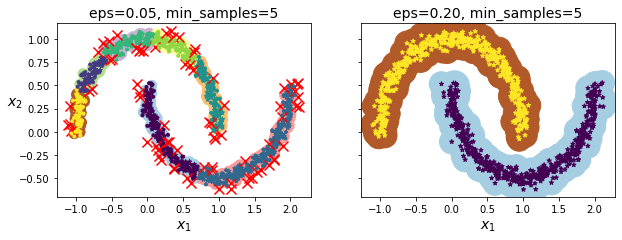

In [111]:
plt.figure(figsize=(10, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

plt.show()

Sorprendentemente, la clase DBSCAN no tiene un método `predict()`, aunque tiene un método `fit_predict()`. En otras palabras, no puede predecir a qué cluster pertenece una nueva instancia. La razón de esta decisión es que varios algoritmos de clasificación podrían tener sentido aquí y es bastante fácil entrenar uno, por ejemplo un `KNeighborsClassifier`:

In [112]:
dbscan = dbscan2

In [113]:
from sklearn.neighbors import KNeighborsClassifier

In [114]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

Ahora, dadas algunas instancias nuevas, podemos predecir a qué cluster probablemente pertencerán e incluso estimar una probabilidad para cada cluster. Tengamos en cuenta que solo entrenamos en las instancias core, pero también podríamos haber elegido entrenar en todas las instancias, o en todas menos las anomalías: esta elección depende de la tarea final.

In [115]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([1, 0, 1, 0], dtype=int64)

In [116]:
knn.predict_proba(X_new)

array([[0.18, 0.82],
       [1.  , 0.  ],
       [0.12, 0.88],
       [1.  , 0.  ]])

El límite de decisión está representado en la siguiente figura (las cruces representan las 4 instancias en `X_new`). Observemos que dado que no existen anomalías en el conjunto de entrenamiento de KNN, el clasificador siempre elige un cluster incluso cuando ese cluster esté muy lejos. Sin embargo, es bastante sencillo introducir una distancia máxima, en cuyo caso las dos instancias que estén lejos de ambos clústeres se clasifican como anomalías. Para hacer esto, podemos usar el método `kneighbors()` del `KNeighborsClassifier`: dado un conjunto de instancias, devuelve las distancias y los índices de los *k* vecinos más cercanos en el conjunto de entrenamiento (dos matrices, cada una con *k* columnas):

In [117]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  0,  1, -1], dtype=int64)

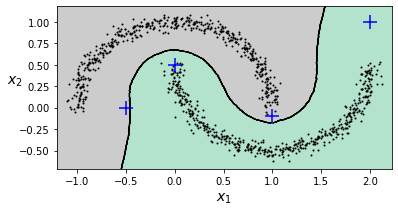

In [118]:
plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)
plt.show()

En resumen, BDSCAN es un algoritmo muy simple pero poderoso, capaz de identificar cualquier número de clústeres, de cualquier forma, es robusto a los valores atípicos y solo tiene dos hiperparámetros (`eps` y `min_samples`). Sin embargo, si la densidad entre los clústeres varía significativamente puede resultarle imposible capturar todos los clústeres correctamente. Además, su complejidad computacional es aproximadamente de O(*m* log *m*), por lo que es bastante lineal respecto al número de instancias. Sin embargo, la implementación de Scikit-Learn puede requerir de hasta O($m^2$) de memoria si `eps` es grande.

## Otros algoritmos de clustering

Scikit-Learn implementa algunos algoritmos de clustering más a los que deberíamos echarles un vistazo. No podemos cubrir todos ellos en detalle aquí, pero esta sería una breve descripción:

+ *Clustering aglomerativo*: se construye una jerarquía de clústeres de abajo a arriba. Pensemos en muchas burbujas diminutas flotando en el agua y gradualmente se unen entre sí hasta que solo haya un gran grupo de burbujas. De forma similar, en cada iteración el clustering aglomerativo conecta los pares más cercanos de clústeres (empezando con instancias individuales). Si dibujamos un árbol con una rama por cada par de clústeres que se mezclaron, obtendríamos un árbol binario de clústeres, donde las hojas son las instancias individuales. Este enfoque escala muy bien a grandes números de instancias o clústeres, puede capturar clústeres de varias formas, produce un árbol de clústeres flexible e informativo en lugar de forzarnos a elegir una escala de clúster en particular, y puede ser usado con cualquier distancia entre pares. Puede escalar muy bien a grandes números de instancias si proporcionamos una matriz de conectividad. Esta es una matriz dispersa *m* por *m* que indica qué pares de instancias son vecinas (por ejemplo, devueltas por `sklearn.neighbors.kneighbors_graph()`) Sin una matriz de conectividad, el algoritmo no escala bien a datasets grandes.

+ *Birch*: este algoritmo se diseñó específicamente para datasets muy grandes y puede ser más rápido que K-Means por lotes, con resultados similares, siempre y cuando el número de características no sea demasiado grande (<20). Construye una estructura de árbol durante el entrenamiento conteniendo solo la información suficiente para asignar rápidamente cada instancia nueva a un cluster, sin tener que almacenar todas las instancias en el árbol: esto permite usar memoria limitada, mientras maneja grandes datasets.

+ *Mean-shift*: este algoritmo empieza situando un círculo centrado en cada instancia, luego por cada círculo calcula la media de todas las instancias localizadas dentro de él, y después mueve el círculo para que esté centrado en la media. A continuación, itera este paso de desplazamiento a la media hasta que todos los círculos dejen de moverse (es decir, hasta que todos ellos estén centrados en la media de las instancias que contiene). Este algoritmo desplaza los círculos en la dirección de la densidad más alta, hasta que cada uno de ellos encuentra un máximo de densidad local. Finalmente, todas las instancias cuyos círculos se han asentado en el mismo lugar (o lo suficientemente cerca) son asignados al mismo cluster. Esto tiene algunas de las mismas características que DBSCAN, en particular puede encontrar cualquier número de clústeres de cualquier forma, tiene solo un hiperparámetro (el radio de los círculos, llamado ancho de banda - *bandwidth*) y se basa en la estimación de densidad local. Sin embargo, tiende a cortar los clústeres en pedazos cuando tienen variaciones internas de densidad. Desafortunadamente, su complejidad computacional es O($m^2$), por lo que no es adecuado para datasets grandes.

+ *Propagación de afinidad*: este algoritmo usa un sistema de votación, donde las instancias votan para qué instancias similares sean sus representantes y, una vez el algoritmo converge, cada representante y sus votantes forman un cluster. Este algoritmo puede detectar cualquier número de clústeres de diferentes tamaños. Desafortunadamente, tiene una complejidad computacional de O($m^2$), por lo que no es adecuado para datasets grandes.

+ *Clustering espectral*: este algoritmo toma una matriz de similitud entre las instancias y reduce su dimensionalidad, entonces usa otro algoritmo de clustering en este espacio de menor dimensión (la implementación de Scikit-Learn usa K-Means). El clustering espectral puede capturar estructuras de cluster complejas y también puede usarse para cortar gráficos (por ejemplo, para identificar clústeres de amigos en una red social), sin embargo, no escala bien a un número grande de instancias, y no se comporta bien cuando los clústeres tiene tamaños muy diferentes.

**Clustering espectral**

In [119]:
from sklearn.cluster import SpectralClustering

In [120]:
sc1 = SpectralClustering(n_clusters=2, gamma=100, random_state=42)
sc1.fit(X)

SpectralClustering(affinity='rbf', assign_labels='kmeans', coef0=1, degree=3,
                   eigen_solver=None, eigen_tol=0.0, gamma=100,
                   kernel_params=None, n_clusters=2, n_components=None,
                   n_init=10, n_jobs=None, n_neighbors=10, random_state=42)

In [121]:
sc2 = SpectralClustering(n_clusters=2, gamma=1, random_state=42)
sc2.fit(X)

SpectralClustering(affinity='rbf', assign_labels='kmeans', coef0=1, degree=3,
                   eigen_solver=None, eigen_tol=0.0, gamma=1,
                   kernel_params=None, n_clusters=2, n_components=None,
                   n_init=10, n_jobs=None, n_neighbors=10, random_state=42)

In [122]:
np.percentile(sc1.affinity_matrix_, 95)

0.04251990648936265

In [123]:
def plot_spectral_clustering(sc, X, size, alpha, show_xlabels=True, show_ylabels=True):
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=size, c='gray', cmap="Paired", alpha=alpha)
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=30, c='w')
    plt.scatter(X[:, 0], X[:, 1], marker='.', s=10, c=sc.labels_, cmap="Paired")
    
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("RBF gamma={}".format(sc.gamma), fontsize=14)

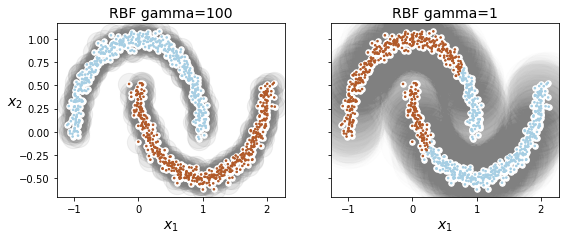

In [124]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_spectral_clustering(sc1, X, size=500, alpha=0.1)

plt.subplot(122)
plot_spectral_clustering(sc2, X, size=4000, alpha=0.01, show_ylabels=False)

plt.show()

**Clustering aglomerativo**

In [125]:
from sklearn.cluster import AgglomerativeClustering

In [126]:
X = np.array([0, 2, 5, 8.5]).reshape(-1, 1)
agg = AgglomerativeClustering(linkage="complete").fit(X)

In [127]:
def learned_parameters(estimator):
    return [attrib for attrib in dir(estimator)
            if attrib.endswith("_") and not attrib.startswith("_")]

In [128]:
learned_parameters(agg)

['children_',
 'labels_',
 'n_clusters_',
 'n_components_',
 'n_connected_components_',
 'n_leaves_']

In [129]:
agg.children_

array([[0, 1],
       [2, 3],
       [4, 5]])

Ahora vamos a sumergirnos en los modelos de mezcla gaussiana, que se pueden usar para estimación de densidad, clustering y detección de anomalías.

# Mezclas Gaussianas

Un *modelo de mezcla gaussiana* (GMM) es un modelo probabilístico que asume que las instancias se generaron a partir de una mezcla de varias distribuciones gaussianas cuyos parámetros son desconocidos. Todas las instancias generadas a partir de una única distribución gaussiana forman un cluster que normalmente se parece a un elipsoide. Cada cluster puede tener una forma elipsoidal, tamaño, densidad y orientación diferentes. Cuando observamos una instancia, sabemos que se generó a partir de distribuciones gaussianas, pero no sabemos cuál y no sabemos los parámetros de esas distribuciones.

Existen diversas variantes de GMM: en la variante más simple, implementada en la clase `GaussianMixture`, debemos saber de antemano el número *k* de distribuciones gaussianas. El dataset  **X** se asume que ha sido generado a través de los siguientes procesos probabilísticos:

+ Por cada instancia, se elige un cluster aleatoriamente entre *k* clústeres. La probabilidad de elegir el cluster $j^{iesimo}$ está definido por el peso $\phi^{(j)}$. El índice del cluster elegido para la instancia $i^{iesimo}$ se denota $z^{(i)}$

+ Si $z^{(i)}=j$, significa que la instancia $i^{iesima}$ se ha asignado al cluster $j^{iesimo}$, la localización **x**$^{(i)}$ de esta instancia se muestrea al azar de la distribución gaussiana con media $\mu^{(j)}$ y matriz de covarianza $\sum^{(j)}$. ESto de denota de la siguiente forma: **x**$^{(i)} \sim \mathcal{N}(\mu^{(j)}, \sum^{(j)})$.

Este proceso generativo puede representarse en un modelo gráfico (véase la siguiente figura). Este es un gráfico que representa la estructura de dependencias condicionales entre variables aleatorias.

![gaussian_mixture](images/ch09/gaussian_mixture.png)

Aquí está cómo interpretarlo:

+ Los círculos representan variables eleatorias.

+ Los cuadrados representan valores fijos (es decir, parámetros del modelo).

+ Los rectángulos se denominan *placas*: indican que su contenido se repite varias veces.

+ El número indicado en la parte inferior derecha de cada placa indica cuántas veces se repite su contenido, por lo que hay *m* variables aleatorias $z^{(i)}$ (desde $z^{(1)}$ hasta $z^{(m)}$) y *m* variables aleatorias **x**$^{(i)}$ y *k* medias $\mu^{(j)}$ y *k* matrices de covarianza $\sum^{(j)}$, pero solo un vector de pesos  $\phi$ (conteniendo todos los pesos $\phi^{(1)}$ a  $\phi^{(k)}$).

+ Cada variable $z^{(i)}$ se extrae de la *distribución categórica* con pesos $\phi$. Cada variable **x**$(i)$ se extrae de la distribución normal con la media y matriz de covarianza definidas por su cluster $z^{(i)}$.

+ Las fechas continuas representan dependiencias condicionales. Por ejemplo, la distribución de probabilidad para cada variable aleatoria $z^{(i)}$ depende del vector de pesos $\phi$. Tengamos en cuenta que cuando una flecha atraviesa los límites de una placa, significa que aplica a todas las repeticiones de esa placa. Así, por ejemplo, el vector de pesos $\phi$ condiciona las distribuciones de probabilidad de todoas las variables **x**$^{(1)}$ a **x**$^{(m)}$.

+ La flecha ondulada de $z^{(i)}$ a $x^{(i)}$ representa un conmutador: dependiendo del valor de $z^{(i)}$, la instancia $x^{(i)}$ se muestreará de una distribución gaussiana diferente. Por ejemplo, si $z^{(i)} = j$, entonces **x**$^{(i)} \sim \mathcal{N}(\mu^{(j)}, \sum^{(j)})$.

+ Los nodos sombreados indican que el valor es conocido, por tanto en este caso solo las variables aleatorias $x^{(i)}$ tienen valores conocidos: se denominan *variables observadas*. Las variables aleatorias desconocidas $z^{(i)}$ se denominan *variables latentes*.

Entonces, ¿qué podemos haces con un modelo así? Bueno, dado el dataset **X**, generalmente queremos empezar estimando los pesos $\phi$ y todos los parámetros de distribución $\mu^{(1)}$ a $\mu^{(k)}$ y $\sum^{(1)}$ a $\sum^{(k)}$. La clase de Scikit-Learn `GaussianMixture` hace esto trivial:

In [130]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [131]:
from sklearn.mixture import GaussianMixture

In [132]:
gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=10,
                precisions_init=None, random_state=42, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

Echemos un vistazo a los parámetros que el algoritmo ha estimado:

In [133]:
gm.weights_

array([0.39032584, 0.20961444, 0.40005972])

In [134]:
gm.means_

array([[ 0.05145113,  0.07534576],
       [ 3.39947665,  1.05931088],
       [-1.40764129,  1.42712848]])

In [135]:
gm.covariances_

array([[[ 0.68825143,  0.79617956],
        [ 0.79617956,  1.21242183]],

       [[ 1.14740131, -0.03271106],
        [-0.03271106,  0.95498333]],

       [[ 0.63478217,  0.72970097],
        [ 0.72970097,  1.16094925]]])

Genial, trabaja bien. De hecho los pesos que se usaron para generar los datos son 0.4, 0.2 y 0.4, y de forma similar, la matriz de medias y covarianzas fueron muy cercanas a las encontradas por el algoritmo. ¿Pero cómo? Esta clase se basa en el algoritmo esperanza-mazimización (*Expectation-Maximization*) (EM), que tiene muchas similitudes con el algoritmo K-Means: también inicializa los parámetros del cluster aleatoriamente, luego repite dos pasos hasta la convergencia: primero asignando instancias a los clústeres (esto se denomina *paso de expectation*) y después actualizando los clústeres (esto se denomina *paso de maximization*). ¿Suena familiar? De hecho, en el contexto de clustering podemos pensar en EM como una generalización de K-Means donde no solo encuentra los centros de los clústeres ($\mu^{(1)}$ a $\mu^{(k)}$), sino también su tamaño, forma y orientación ($\sum^{(1)}$ a $\sum^{(k)}$), así como sus pesos relativos ($\phi^{(1)}$ a $\phi^{(k)}$). A diferencia de K-Means, EM usa *soft clustering* en lugar de *hard clustering*: para cada instancia durante el paso de expectation, el algoritmo estima la probabilidad de pertenencia a cada cluster (basada en los parámetros del cluster actual). Después, durante la fase de maximization, cada cluster se actualiza usando *todas* las instancias del dataset, con cada instancias ponderada por la probabilidad estimada de pertenecer a ese cluster. Estas probabilidades se denominan *responsabilidades* de los clústeres para las instancias. Durante el paso de maximization, la actualización de cada cluster se verá afectada principalmente por las instancias de las que es más responsable.

---

Desafortunadamente, al igual de K-Means, EM puede terminar convergiendo a soluciones pobres, por lo que necesita ejecutarse varias veces, quedándose solo con la mejor solución. Esto es por lo que establecemos `n_init` a 10. Tengamos cuidado: por defecto `n_init` está establecido a 1.

---

Podemos comprobar si el algoritmo convergió o no y cuántas iteraciones necesitó:

In [136]:
gm.converged_

True

In [137]:
gm.n_iter_

4

Bien, ahora que tenemos una estimación de la localización, tamaño, forma, orientación y peso relativo de cada cluster, el modelo puede asignar fácilmente cada instancia al cluster más probable (hard clustering) o estimar la probabilidad de pertenecer a un cluster en particular (soft clustering). Para ello, usamos el método `predict()` para hard clustering o el método `predict_proba()` para soft clustering.

In [138]:
gm.predict(X)

array([0, 0, 2, ..., 1, 1, 1], dtype=int64)

In [139]:
gm.predict_proba(X)

array([[9.76815996e-01, 2.31833274e-02, 6.76282339e-07],
       [9.82914418e-01, 1.64110061e-02, 6.74575575e-04],
       [7.52377580e-05, 1.99781831e-06, 9.99922764e-01],
       ...,
       [4.31902443e-07, 9.99999568e-01, 2.12540639e-26],
       [5.20915318e-16, 1.00000000e+00, 1.45002917e-41],
       [2.30971331e-15, 1.00000000e+00, 7.93266114e-41]])

Es un *modelo generativo*, lo que significa que realmente puede muestrear nuevas instancias a partir de él (observemos que están ordenadas por el índice del cluster):

In [140]:
X_new, y_new = gm.sample(6)
X_new

array([[-0.86951041, -0.32742378],
       [ 0.29854504,  0.28307991],
       [ 1.84860618,  2.07374016],
       [ 3.98304484,  1.49869936],
       [ 3.8163406 ,  0.53038367],
       [-1.04030781,  0.78655831]])

In [141]:
y_new

array([0, 0, 1, 1, 1, 2])

También es posible estimar la densidad del modelo en cualquier localización dada. Esto se consigue usando el método `score_samples()`: por cada instancia dada, este método estima el logaritmo de la *función de densidad de probabilidad (PDF)* en esa localización. Cuanto mayor sea la puntuación, mayor es la densidad:

In [142]:
gm.score_samples(X)

array([-2.60786904, -3.57094519, -3.3302143 , ..., -3.51359636,
       -4.39793229, -3.80725953])

Si calculamos la exponencial de estas puntuaciones, obtendremos el valor de PDF en la localización de las instancias dadas. Estas *no* son probabilidades, sino *densidades* de probabilidad: pueden tomar cualquier valor positivo, no solo entre 0 y 1. Para estimar la probabilidad de que una instancia caiga dentro de una región particular, tendríamos que integrar la PDF sobre dicha región (si lo hacemos sobre todo el espacio de posibles ubicaciones de instancia, el resultado sería 1).

In [143]:
resolution = 100
grid = np.arange(-10, 10, 1 / resolution)
xx, yy = np.meshgrid(grid, grid)
X_full = np.vstack([xx.ravel(), yy.ravel()]).T

pdf = np.exp(gm.score_samples(X_full))
pdf_probas = pdf * (1 / resolution) ** 2
pdf_probas.sum()

0.9999999999225099

La siguiente figura muestra las medias del cluster, los límites de decisión (líneas discontinuas) y los contornos de densidad de este modelo:

In [144]:
from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

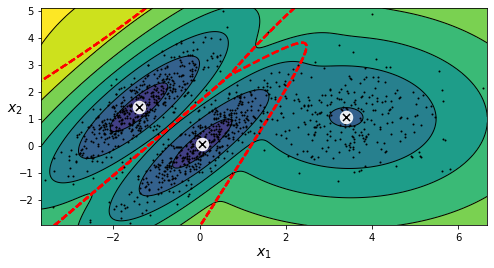

In [145]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)

plt.show()

¡Bonito! El algoritmo ha encontrado claramente una solución excelente. Por supuesto, hemos facilitado su tarea generando los datos usando un conjunto de distribuciones gaussianas 2D (desafortunadamente, los datos de la vida real no son siempre tan gaussianos ni con tan baja dimensionalidad) y también le proporcionamos al algoritmo el número correcto de clústeres. Cuando hay muchas dimensiones, o muchos clústeres, o pocas instancias, EM puede tener dificultades para converger a una solución óptima. Es posible que necesitemos reducir la dificultad de las tareas limitando el número de parámetros que el algoritmo tiene que aprender: una forma de hacer esto es limitar el rango de formas y orientaciones que pueden tener los clústeres. Esto se puede conseguir imponiendo restricciones en las matrices de covarianza. Para hacer esto, establecemos el hiperparámetro `covariance_type` a uno de los siguientes valores:

+ "`full`": (por defecto) sin restricciones, todos los clústeres pueden tomar cualquier forma elipsoidal de cualquier tamaño.

+ "`spherical`": todos los clústeres deben ser esféricos, pero pueden tener diferentes diámetros (es decir, diferentes varianzas).

+ "`diag`": los clústeres pueden adoptar cualquier forma elipsoidal de cualquier tamaño, pero los ejes de la elipse deben ser paralelos al eje de coordenadas (es decir, las matrices de covarianza deben ser diagonales).

+ "`tied`": todos los clústeres deben tener la misma forma elipsoidal, tamaño y orientación (es decir, todos los clústeres comparten la misma matriz de covarianza).

Por defecto, `covariance_type` es igual a "`full`", lo que significa que cada cluster puede tomar cualquier forma, tamaño y orientación (tiene su propia matriz de covarianza sin restricciones). La siguiente figura muestra las soluciones encontradas por el algoritmo EM cuando `covariance_type` se establece a "`tied`" o "`spherical`".

In [146]:
gm_full = GaussianMixture(n_components=3, n_init=10, covariance_type="full", random_state=42)
gm_tied = GaussianMixture(n_components=3, n_init=10, covariance_type="tied", random_state=42)
gm_spherical = GaussianMixture(n_components=3, n_init=10, covariance_type="spherical", random_state=42)
gm_diag = GaussianMixture(n_components=3, n_init=10, covariance_type="diag", random_state=42)
gm_full.fit(X)
gm_tied.fit(X)
gm_spherical.fit(X)
gm_diag.fit(X)

GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=10,
                precisions_init=None, random_state=42, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [147]:
def compare_gaussian_mixtures(gm1, gm2, X):
    plt.figure(figsize=(9, 4))

    plt.subplot(121)
    plot_gaussian_mixture(gm1, X)
    plt.title('covariance_type="{}"'.format(gm1.covariance_type), fontsize=14)

    plt.subplot(122)
    plot_gaussian_mixture(gm2, X, show_ylabels=False)
    plt.title('covariance_type="{}"'.format(gm2.covariance_type), fontsize=14)

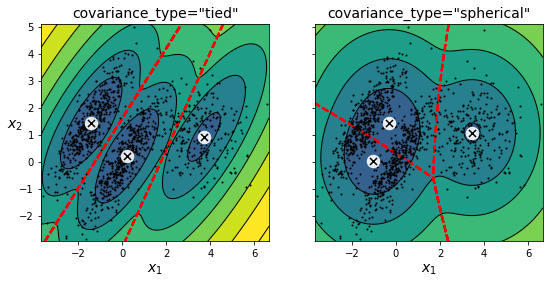

In [148]:
compare_gaussian_mixtures(gm_tied, gm_spherical, X)

plt.show()

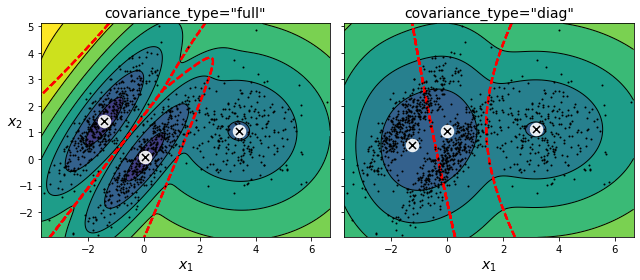

In [149]:
compare_gaussian_mixtures(gm_full, gm_diag, X)
plt.tight_layout()
plt.show()

---

La complejidad computacional de entrenamiento de un modelo `GaussianMixture` depende del número de instancias *m*, del número de dimensiones *n*, del número de clústeres *k* y de las restricciones en las matrices de covarianza. Si `covariance_types` es `spherical` o `diag`, es *O(kmn)*, asumiendo que los datos tienen estructura de clustering. Si `covariance_type` es `tied` o `full`, es *O(kmn$^2$ + kn$^3$)*, por tanto no escalará a un gran número de características.

---

Los modelos de mezcla gaussiana también son usados para detección de anomalías. Veamos cómo.

## Detección de anomalías usando mezclas gaussianas

La *detección de anomalías* (también denominada *detección de valores atípicos*) es la tarea de detectar instancias que se desvían fuertemente de la norma. Estas instancias se denominan *anomalías* o *valores atípicos* (*outliers*), mientras que las instancias normales se denominan *inliers*. La detección de anomalías es muy útil en una amplia variedad de aplicaciones, por ejemplo en la detección de fraude, detección de defectos de manufactura, eliminación de valores atípicos en un dataset antes de entrenar un modelo, lo que puede mejorar significativamente la ejecución del modelo resultante.

Usar un modelo de mezcla gaussiana para la detección de anomalías es bastante simple: cualquier instancia ubicada en una región de baja densidad puede ser considerada una anomalía. Debemos definir cuál es el umbral de densidad que queremos usar. Por ejemplo, en una compañía de manufactura que intenta detectar productos defectuosos, el ratio de productos defectuosos es generalmente bien conocido. Digamos que es igual al 4%, entonces podemos establecer el umbral de densidad para que sea el valor que resulte de tener el 4% de las instancias ubicadas en areas por debajo de ese umbral de densidad. Si observamos que obtenemos demasiados falsos positivos (es decir, productos buenos que son marcados como defectuosos), podemos disminuir el umbral. Por el contrario, si obtenemos demasiados falsos negativos (es decir, productos defectuosos que nos son marcados como defectuosos) podemos incrementar el umbral. Esto es el equilibro normal precisión/sensibilidad. Así es como se identificarían los valores atípicos usando la densidad más baja del percentil 4 como umbral (es decir, aproximadamente el 4% de las instancias serán marcadas como anomalías):

In [150]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]

En la siguiente figura se representan estas anomalías como estrellas.

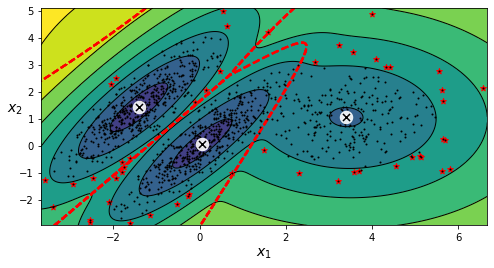

In [151]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*')
plt.ylim(top=5.1)

plt.show()

Una tarea estrechamente relacionada es la *detección de novedades*: difiere de la detección de anomalías en que se asume que el algoritmo está entrenado en un dataset "limpio", sin contaminar por valores atípicos, mientras que la detección de anomalías no hace esta asunción. De hecho, la detección de anomalías a menudo se usa precisamente para limpiar un dataset.

---

Los modelos de mezcla gaussiana intentan entrenar todos los datos, incluyendo los valores atípicos, por tanto, si tenemos demasiados de ellos esto sesgará la visión de "normalidad" del modelo: algunos valores atípicos pueden ser considerados normales erróneamente. Si esto sucede, podemos intentar entrenar el modelo una vez, usarlo para detectar y eliminar la mayoría de los valores atípicos más extremos y después entrenar de nuevo el modelo en el dataset limpio. Otro enfoque es usar un método robusto de estimación de covarianza (ver la clase `EllipticEnvelope`).

---

Al igual que K-Means, el algoritmo `GaussianMixture` requiere que especifiquemos el número de clústeres. Así que ¿cómo encontrarlo?.

## Selección del número de clústeres

Con K-Means, podíamos usar la inercia o la puntuación de silueta para seleccionar el número apropiado de clústeres, pero con las mezclas gaussianas no es posible usar estas métricas porque no son fiables cuando los clústeres no son esféricos o tienen tamaños diferentes. En su lugar, podemos intentar buscar el modelo que minimice un *criterio de información teórico* tal como el *criterio de información bayesiano (BIC)* o el *criterio de información Akaike (AIC)*, definidos en las siguientes ecuaciones:

${BIC} = {\log(m)p - 2\log({\hat L})}$

${AIC} = 2p - 2\log(\hat L)$

* $m$ es el número de instancias, como siempre.
* $p$ es el número de parámetros aprendidos por el modelo.
* $\hat L$ es el valor maximizado por la *función de probabilidad* del modelo.

Tanto BIC como AIC penalizan modelos que tienen más parámetros para aprender (es decir, más clústeres) y recompensan modelos que se ajustan bien a los datos. A menudo terminan seleccionando el mismo modelo, pero cuando difieren, el modelo seleccionado por BIC tiende a ser más simple (menos parámetros) que el seleccionado por AIC, pero no se ajusta tan bien a los datos (esto es especialmente cierto para grandes datasets).

---

**Función de Probabilidad (Likelihood function)**

En el lenguaje inglés "probability" y "likelihood" a menudo se usan de forma equivalente, pero tienen significados muy diferentes en estadística: dado un modelo estadístico con algunos parámetros $\theta$, la palabra "probability" se usa para describir cómo es de plausible un resultado **x** futuro (conociendo los valores de los parámetros $\theta$), mientras que la palabra "likelihood" se usa para describir cómo de plausibles son un conjunto particular de valores de parámetros $\theta$, después de conocido el resultado **x**.

Consideremos un modelo de mezcla unidimensional de dos distribuiciones gaussianas centrado en -4 y +1. Por simplicidad, este modelo de juguete tiene un único parámetro $\theta$ que controla las desviaciones estándar de ambas distribuciones. En la esquina superior derecha de la siguiente figura se muestra el modelo completo $f(x; \theta)$ como función de $x$ y $\theta$. Para estimar la distribución de probabilidad de un resultado $x$ futuro, necesitamos establecer el parámetro de modelo $\theta$. Por ejemplo, si establecemos a $\theta=1.3$ (la línea horizontal), obtendríamos la función de densidad de probabilidad $f(x; \theta=1.3)$ mostrada en la esquina inferior derecha. Digamos que queremos estimar la probabilida de que $x$ esté entre -2 y +2, debemos calcular la integral de PDF en dicho rango (es decir, la superficie de la región sombreada). Por otra parte, si disponemos de una única instancia $x=2.5$ (la línea vertical en el gráfico de la esquina superior izquierda), obtendríamos la función de probabilidad (likelihood) denotada como  $\mathcal{L}(\theta|x=2.5) = f(x=2.5; \theta)$, representada en el gráfico de la esquina superior derecha.

Brevemente, PDF es una función de $x$ (con $\theta$ fija) mientras que la función de probabilidad es una función de $\theta$ (con $x$ fija). Es importante comprender que la función de probabilidad *no* es una distribución de probabilidad: si integramos una distribución de probabilidad en todos los valores posibles de $x$ siempre obtendremos 1, pero si integramos la función de probabilidad sobre todos los valores posibles de $\theta$ el resultado puede ser cualquier valor positivo.

Dado un dataset **X**, una tarea común es intentar estimar los valores más probables de parámetros del modelo. Para hacer esto, debemos encontrar los valores que maximicen la función de probabilidad, dado **X**. En este ejemplo, si disponemos de una única instancia $x=2.5$, la probabilidad máxima estimada (*maximum likelihood estimate - MLE*) de $\theta$ es $\hat{\theta}=1.5$. Si existe una distribución de probabilidad *g* previa sobre $\theta$, es posible tenerla en cuenta maximizando $\mathcal{L}(\theta|x) g(\theta)$ en lugar de maximizar simplemente $\mathcal{L}(\theta|x)$. Esto se denomina estimación de máximo a posteriori (MAP). Dado que MAP contiene los valores de los parámetros, podemos pensar en ella como una versión regularizada de MLE.

Observemos que es equivalente a maximizar la función de probabilidad o maximizar su logaritmo (representado por el gráfico de la esquina inferior derecha): de hecho, el logaritmo es una función estrictamente creciente, por tanto si $\theta$ maximiza el logaritmo de la probabilidad, también maximiza la probabilidad. Resulta que, en general, es más fácil maximizar el logaritmo de la probabilidad. Por ejemplo, si contamos con varias instancias independientes $x^{(1)}$ a $x^{(m)}$, podríamos necesitar encontrar el valor de $\theta$ que maximice el producto de las funciones de probabilidad individuales. Pero esto es equivalente y mucho más simple que maximizar la suma (no el producto) de los logaritmos de las funciones de probabilidad, gracias a la magia del logaritmo que convierte los productos en sumas: $log(ab) = log(a) + log(b)$.

Una vez que hemos estimado $\hat{\theta}$, el valor de $\theta$ que maximiza la función de probabilidad, entonces estamos listos para calcular $\hat{L} = \mathcal{L}(\hat{\theta}, X)$. Este es el valor que es usado para calcular AIC y BIC: podemos pensar en ello como una medida de cómo de bien el modelo se ajusta a los datos.

---

In [152]:
from scipy.stats import norm

In [153]:
xx = np.linspace(-6, 4, 101)
ss = np.linspace(1, 2, 101)
XX, SS = np.meshgrid(xx, ss)
ZZ = 2 * norm.pdf(XX - 1.0, 0, SS) + norm.pdf(XX + 4.0, 0, SS)
ZZ = ZZ / ZZ.sum(axis=1)[:,np.newaxis] / (xx[1] - xx[0])

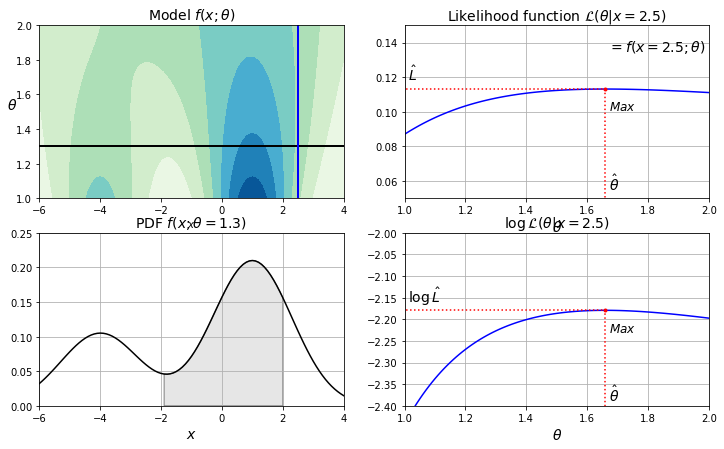

In [162]:
from matplotlib.patches import Polygon

plt.figure(figsize=(12, 7))

x_idx = 85
s_idx = 30

plt.subplot(221)
plt.contourf(XX, SS, ZZ, cmap="GnBu")
plt.plot([-6, 4], [ss[s_idx], ss[s_idx]], "k-", linewidth=2)
plt.plot([xx[x_idx], xx[x_idx]], [1, 2], "b-", linewidth=2)
plt.xlabel(r"$x$")
plt.ylabel(r"$\theta$", fontsize=14, rotation=0)
plt.title(r"Model $f(x; \theta)$", fontsize=14)

plt.subplot(222)
plt.plot(ss, ZZ[:, x_idx], "b-")
max_idx = np.argmax(ZZ[:, x_idx])
max_val = np.max(ZZ[:, x_idx])
plt.plot(ss[max_idx], max_val, "r.")
plt.plot([ss[max_idx], ss[max_idx]], [0, max_val], "r:")
plt.plot([0, ss[max_idx]], [max_val, max_val], "r:")
plt.text(1.01, max_val + 0.005, r"$\hat{L}$", fontsize=14)
plt.text(ss[max_idx]+ 0.01, 0.055, r"$\hat{\theta}$", fontsize=14)
plt.text(ss[max_idx]+ 0.01, max_val - 0.012, r"$Max$", fontsize=12)
plt.axis([1, 2, 0.05, 0.15])
plt.xlabel(r"$\theta$", fontsize=14)
plt.grid(True)
plt.text(1.99, 0.135, r"$=f(x=2.5; \theta)$", fontsize=14, ha="right")
plt.title(r"Likelihood function $\mathcal{L}(\theta|x=2.5)$", fontsize=14)

plt.subplot(223)
plt.plot(xx, ZZ[s_idx], "k-")
plt.axis([-6, 4, 0, 0.25])
plt.xlabel(r"$x$", fontsize=14)
plt.grid(True)
plt.title(r"PDF $f(x; \theta=1.3)$", fontsize=14)
verts = [(xx[41], 0)] + list(zip(xx[41:81], ZZ[s_idx, 41:81])) + [(xx[80], 0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
plt.gca().add_patch(poly)

plt.subplot(224)
plt.plot(ss, np.log(ZZ[:, x_idx]), "b-")
max_idx = np.argmax(np.log(ZZ[:, x_idx]))
max_val = np.max(np.log(ZZ[:, x_idx]))
plt.plot(ss[max_idx], max_val, "r.")
plt.plot([ss[max_idx], ss[max_idx]], [-5, max_val], "r:")
plt.plot([0, ss[max_idx]], [max_val, max_val], "r:")
plt.axis([1, 2, -2.4, -2])
plt.xlabel(r"$\theta$", fontsize=14)
plt.text(ss[max_idx]+ 0.01, max_val - 0.05, r"$Max$", fontsize=12)
plt.text(ss[max_idx]+ 0.01, -2.39, r"$\hat{\theta}$", fontsize=14)
plt.text(1.01, max_val + 0.02, r"$\log \, \hat{L}$", fontsize=14)
plt.grid(True)
plt.title(r"$\log \, \mathcal{L}(\theta|x=2.5)$", fontsize=14)

plt.show()

Para calcular BIC y AIC sólo tenemos que llamar a los métodos `bic()` o `aic()`:

In [163]:
gm.bic(X)

8189.733705221635

In [164]:
gm.aic(X)

8102.508425106597

La siguiente figura muestra el BIC para diferentes números de clústeres *k*. Como podemos ver, tanto el BIC como el AIC son los más bajos cuando $k=3$, por lo que serán probablemente la mejor opción. Observemos que también podríamos buscar el mejor valor para el hiperparámetro `covariance_type`. Por ejemplo, si es "`spherical`" en lugar de "`full`", entonces el modelo tiene muchos menos parámetros que aprender, pero no se ajustaría también a los datos.

In [165]:
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X)
             for k in range(1, 11)]

In [166]:
bics = [model.bic(X) for model in gms_per_k]
aics = [model.aic(X) for model in gms_per_k]

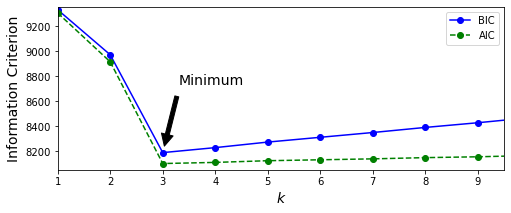

In [167]:
plt.figure(figsize=(8, 3))
plt.plot(range(1, 11), bics, "bo-", label="BIC")
plt.plot(range(1, 11), aics, "go--", label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Information Criterion", fontsize=14)
plt.axis([1, 9.5, np.min(aics) - 50, np.max(aics) + 50])
plt.annotate('Minimum',
             xy=(3, bics[2]),
             xytext=(0.35, 0.6),
             textcoords='figure fraction',
             fontsize=14,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.legend()
plt.show()

Busquemos la mejor combinación de valores tanto para el número de clústeres como para el hiperparámetro `covariance_type`:

In [168]:
min_bic = np.infty

for k in range(1, 11):
    for covariance_type in ("full", "tied", "spherical", "diag"):
        bic = GaussianMixture(n_components=k, n_init=10,
                              covariance_type=covariance_type,
                              random_state=42).fit(X).bic(X)
        if bic < min_bic:
            min_bic = bic
            best_k = k
            best_covariance_type = covariance_type

In [169]:
best_k

3

In [170]:
best_covariance_type

'full'

## Modelos de mezcla gaussiana bayesiana

En lugar de buscar manualmente el número óptimo de clústeres, es posible usar la clase `BayesianGaussianMixture` que es capaz de proporcionarnos pesos iguales (o cercanos) a cero para los cluster innecesarios. Solo tenemos que establecer el número de clústeres `n_components` a un valor que tengamos una buena razón para creer que es mayor que el número óptimo de clústeres (esto asume un mínimo conocimiento del problema entre manos) y el algoritmo eliminará automáticamente los clústeres innecesarios. Por ejemplo, establezcamos el número de clústeres a 10 y veamos qué ocurre:

In [171]:
from sklearn.mixture import BayesianGaussianMixture

In [172]:
bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X)

C:\Program Files\Python38\lib\site-packages\sklearn\mixture\_base.py:263: ConvergenceWarning: Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '


BayesianGaussianMixture(covariance_prior=None, covariance_type='full',
                        degrees_of_freedom_prior=None, init_params='kmeans',
                        max_iter=100, mean_precision_prior=None,
                        mean_prior=None, n_components=10, n_init=10,
                        random_state=42, reg_covar=1e-06, tol=0.001, verbose=0,
                        verbose_interval=10, warm_start=False,
                        weight_concentration_prior=None,
                        weight_concentration_prior_type='dirichlet_process')

In [173]:
np.round(bgm.weights_, 2)

array([0.4 , 0.  , 0.  , 0.  , 0.39, 0.2 , 0.  , 0.  , 0.  , 0.  ])

Perfecto, el algoritmo ha detectado automáticamente que solo son necesarios 3 clústeres y los clústeres resultantes son casi idénticos a los que ya vimos.

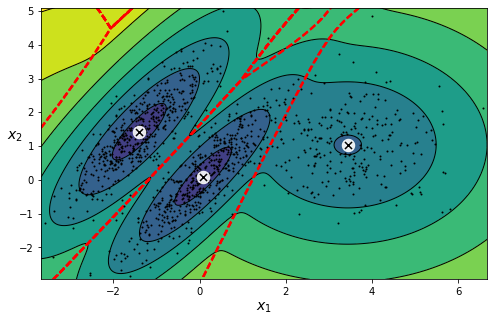

In [174]:
plt.figure(figsize=(8, 5))
plot_gaussian_mixture(bgm, X)
plt.show()

En este modelo, los parámetros de cluster (incluyendo los pesos, medias y matrices de covarianzas) no son tratados como parámetros de modelo fijos, sino como variables aleatorias latentes, como las asignaciones de cluster (véase la siguiente figura). Así, **z** ahora incluye tanto los parámetros de cluster como las asignaciones de cluster.

![bayesian_gaussian_mixture](images/ch09/bayesian_gaussian_mixture.png)

El conocimiento previo sobre las variables latentes **z** puede ser codificado en una distribución de probabilidad $p(z)$ llamada *previa*. Por ejemplo, podemos tener una creencia previa de que es probable que los clústeres sean pocos (baja concentración), o a la inversa, que probablemente sean abundantes (alta concentración). Esto puede ser ajustado usando el hiperparámetro `weight_concentration_prior`. Establecerlo a 0.01 ó 1000 nos proporciona diferentes clusterings (véase la siguiente figura). Sin embargo, cuantos más datos tengamos, menos importan los antecedentes. De hecho, para dibujar diagramas con tan grandes diferencias debemos usar datos a priori muy sólidos y pocos datos.

In [179]:
bgm_low = BayesianGaussianMixture(n_components=10, max_iter=1000, n_init=1,
                                  weight_concentration_prior=0.01, random_state=42)
bgm_high = BayesianGaussianMixture(n_components=10, max_iter=1000, n_init=1,
                                  weight_concentration_prior=10000, random_state=42)
nn = 73
bgm_low.fit(X[:nn])
bgm_high.fit(X[:nn])

BayesianGaussianMixture(covariance_prior=None, covariance_type='full',
                        degrees_of_freedom_prior=None, init_params='kmeans',
                        max_iter=1000, mean_precision_prior=None,
                        mean_prior=None, n_components=10, n_init=1,
                        random_state=42, reg_covar=1e-06, tol=0.001, verbose=0,
                        verbose_interval=10, warm_start=False,
                        weight_concentration_prior=10000,
                        weight_concentration_prior_type='dirichlet_process')

In [180]:
np.round(bgm_low.weights_, 2)

array([0.49, 0.51, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

In [181]:
np.round(bgm_high.weights_, 2)

array([0.43, 0.01, 0.01, 0.11, 0.01, 0.01, 0.01, 0.37, 0.01, 0.01])

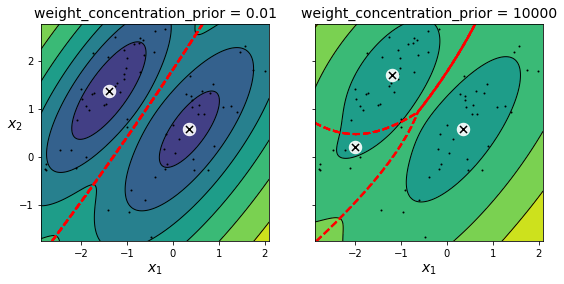

In [182]:
plt.figure(figsize=(9, 4))

plt.subplot(121)
plot_gaussian_mixture(bgm_low, X[:nn])
plt.title("weight_concentration_prior = 0.01", fontsize=14)

plt.subplot(122)
plot_gaussian_mixture(bgm_high, X[:nn], show_ylabels=False)
plt.title("weight_concentration_prior = 10000", fontsize=14)

plt.show()

El teorema de Bayes nos dice cómo actualizar la distribución de probabilidad sobre las variables latentes después observar algunos datos **X**. Calcula la distribución *posterior* $p(z|X)$, que es la probabilidad condicional de **z** dado **X**.

***Teorema de Bayes***

$p(z|X) = \text{Posterior} = \frac{\text{Probabilidad x Previa}}{\text{Evidencia}} = \frac{p(X|z) p(z)}{p(X)}$

Desafortunadamente, en un modelo de mezcla gaussiana (y muchos otros problemas), el denominador $p(x)$ es intratable, ya que requiere integrar sobre todos los valores posibles de **z**. Esto significa considerar todas las posibles combinaciones de los parámetros de cluster y asignaciones de cluster.

***La evidencia p(X) es a menudo intratable***

$p\begin{pmatrix}X\end{pmatrix} = \int p(X|z) \, p(z) \, dz$

Este es el problema central en la estadística bayesiana y existen varios enfoques para solventarlo. Uno de ellos es la *inferencia variacional*, que elige una familia de distribuciones $q(z; \lambda)$ con sus propios *parametros variacionales* $\lambda$, luego optimiza estos parámetros para hacer de $q(z)$ una buena aproximación de $p(z|X)$. Esto se alcanza encontrando el valor de $\lambda$ que minimiza la divergencia KL desde $q(z)$ hasta $p(z|X)$, denotada como $D_{KL}(q\|p)$. La ecuación de divergencia KL se muestra a continuación y puede ser reescrita como el logaritmo de la evidencia ($log \, p(X)$) menos el *límite inferior de la evidencia* (*evidence lower bound - ELBO*). Dado que el logaritmo de la evidencia no depende de *q*, es un término constante, minimizar la divergencia KL solo requiere maximizar ELBO.

***Divergencia KL desde $q(z)$ hasta $p(z|X)$***

![kl_divergence](images/ch09/kl_divergence.png)

En la práctica existen diferentes técnicas para maximizar ELBO. En la *inferencia variacional por campo medio*, es necesario elegir la familia de distribuciones $q(z; \lambda)$ y la previa $p(z)$ muy cuidadosamente para garantizar que la ecuación para ELBO se simplifique en una forma que sea realmente computable. Desafortunadamente, no existe una forma general de hacer esto, depende de la tarea y requieres algunas habilidades matemáticas. Por ejemplo, las distribuciones y las ecuaciones del límite inferior usadas en la clase `BayesianGaussianMixture` de Scikit-Learn se presentan en la [documentación](https://homl.info/40). A partir de estas ecuaciones es posible derivar ecuaciones de actualización para los parámetros de cluster y variables de asignación: éstas se utilizan de manera muy similar al algoritmo Expectation-Maximization. De hecho, la complejidad computacional de la clase `BayessianGaussianMixture` es similar a la de la clase `GaussianMixture` (pero significativamente más lenta, en general). Una aproximación más simple a la maximización de ELBO se denomina *inferencia variacional estocástica de caja negra* (BBSVI): en cada iteración se extraen algunas muestras de *q* que son usadas para estimar los gradientes de ELBO con respecto a los parámetros variacionales $\lambda$, que luego son usando en un paso de gradiente ascendente. Este enfoque hace posible usar inferencia bayesiana con cualquier tipo de modelo (siempre que sea diferenciable), incluso redes neuronales profundas: esto se denomina aprendizaje profundo bayesiano.

Los modelos de mezcla gaussiana trabajan genial en clústeres con formas elipsoidales, pero si intentamos entrenar un dataset con formas diferentes podemos obtener malas sorpresas. Por ejemplo, veamos qué ocurre si usamos un modelo de mezcla gaussiana bayesiano para clusterizar el dataset de lunas:

In [183]:
X_moons, y_moons = make_moons(n_samples=1000, noise=0.05, random_state=42)

In [184]:
bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X_moons)

BayesianGaussianMixture(covariance_prior=None, covariance_type='full',
                        degrees_of_freedom_prior=None, init_params='kmeans',
                        max_iter=100, mean_precision_prior=None,
                        mean_prior=None, n_components=10, n_init=10,
                        random_state=42, reg_covar=1e-06, tol=0.001, verbose=0,
                        verbose_interval=10, warm_start=False,
                        weight_concentration_prior=None,
                        weight_concentration_prior_type='dirichlet_process')

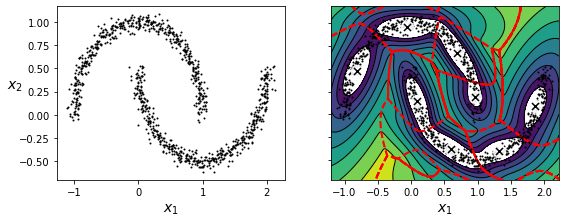

In [185]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_data(X_moons)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)

plt.subplot(122)
plot_gaussian_mixture(bgm, X_moons, show_ylabels=False)

plt.show()

¡Ups! El algoritmo busca desesperadamente elipsoides, por tanto encuentra 8 diferentes clústeres, en lugar de 2. La estimación de densidad no está demasiado mal, por lo que este modelo quizás podría utilizarse para detección de anomalías, pero falla en identificar las dos lunas. Veamos ahora algunas algoritmos de clustering capaces de manejarse con clústeres de formas arbitrarias.

## Otros algoritmos de detección de anomalías y detección de novedades

Scikit-Learn también implementa algunos algoritmos dedicados a la detección de anomalías y novedades:

+ *Fast-MCD* (determinante de covarianza mínimo), implementado por la clase `EllipticEnvelope`: este algoritmo es útil para la detección de valores atípicos, en particular para limpiar un dataset. Asume que las instancias normales están generadas a partir de una única distribución gaussiana (no una mezcla), pero también asume que el dataset está contaminado con valores atípicos que no fueron generados a partir de esta distribución gaussiana. Cuando estima los parámetros de la distribución gaussiana (es decir, la forma de la envolvente elíptica alrededor de los valores atípicos) hay que tener cuidado de ignorar las instancias que probablemente sean atípicas. Esto da una mejor estimación de la envolvente elíptica y, por tanto, mejora la identificación de los atípicos.